# CHURN

# Imports

In [1]:
pip install catboost


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\josel\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\josel\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
! pip install --upgrade scikit-learn


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\josel\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
 !pip install --upgrade xgboost scikit-learn


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\josel\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [5]:
# gestión de datos
import numpy as np
import pandas as pd

# # fechas
# import datetime as dt
# from datetime import datetime
# from dateutil.relativedelta import relativedelta

# gráficos
%pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# modelos
from sklearn.linear_model import LinearRegression, Ridge, SGDRegressor, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

# metricas
import sklearn.metrics as metrics

# hiperparametrizado
from sklearn.model_selection import GridSearchCV

# interpretabilidad
%pip install shap
import shap

# quitar alertas
import warnings
warnings.filterwarnings("ignore")

# para visualizar mas columnas en un df
pd.set_option('display.max_columns',None)

np.random.seed(42)

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\josel\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\josel\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
C:\Users\josel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
""" df_entrenar = pd.read_csv("/content/drive/MyDrive/Grupo_TFM/DSC{22-dsc-1124-bcn} - Entregable 2 {Sallent, Gedde,Luengo,Gaveglio}/churn - dataset a entrenar.csv")
df_predecir = pd.read_csv("/content/drive/MyDrive/Grupo_TFM/DSC{22-dsc-1124-bcn} - Entregable 2 {Sallent, Gedde,Luengo,Gaveglio}/churn - dataset a predecir.csv") """

df_predecir = pd.read_csv('churn - dataset a predecir.csv')
df_entrenar = pd.read_csv('churn - dataset a entrenar.csv')

# Business Understanding​

## EDA: Analisis Exploratorio

In [7]:
# observamos la forma del dataframe a entrenar
df_entrenar.shape

(50000, 86)

In [8]:
# observamos la forma del dataframe a predecir
df_predecir.shape


(1500, 85)

In [9]:
# observamos las primeras filas del dataframe a entrenar
df_entrenar.head()

,rev,mou,totmrc,ovrmou,ovrrev,vceovr,roam,change_mou,change_rev,drop_vce,blck_vce,blck_dat,unan_vce,plcd_vce,recv_vce,comp_vce,comp_dat,custcare,ccrndmou,cc_mou,inonemin,threeway,mou_cvce,mou_rvce,owylis_vce,mouowylisv,iwylis_vce,mouiwylisv,peak_vce,peak_dat,mou_peav,opk_vce,opk_dat,mou_opkv,mou_opkd,drop_blk,attempt,complete,callwait,churn,months,uniqsubs,actvsubs,crclscod,asl_flag,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,prizm_social_one,area,dualband,refurb_new,hnd_price,phones,models,hnd_webcap,truck,rv,ownrent,lor,marital,infobase,income,numbcars,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,23.9975,219.25,22.50,0.0,0.0,0.0,0.0,-157.25,-18.9975,0.666667,0.666667,0.0,6.333333,52.333333,42.333333,45.000000,0.0,0.000000,0.000000,0.000000,18.000000,0.000000,90.643333,97.176667,0.000000,0.000000,0.000000,0.000000,58.000000,0.0,132.600000,24.000000,0.0,55.220000,0.0,1.333333,52.333333,45.000000,0.333333,1,61,2,1,A,N,1652,4228.00000,1504.62,1453.44,4085.00,1602,29.66,83.37,32.69,272,116,30,322.0,136.0,38.0,S,NORTHWEST/ROCKY MOUNTAIN AREA,Y,N,149.98999,2.0,2.0,WCMB,0.0,0.0,O,15.0,S,M,4.0,3.0,0.0,N,U,U,U,U,U,Y,361.0,1000001
1,55.2300,570.50,71.98,0.0,0.0,0.0,0.0,38.50,0.0000,9.666667,0.666667,0.0,77.000000,222.333333,94.666667,137.000000,0.0,8.666667,15.000000,11.076667,66.000000,0.000000,285.233333,106.330000,14.666667,10.816667,0.666667,0.366667,97.333333,0.0,173.476667,90.333333,0.0,218.086667,0.0,10.333333,222.333333,137.000000,0.000000,0,57,1,1,A,N,4485,14028.00000,2181.12,2166.48,13965.00,4452,38.69,249.38,79.50,558,191,55,586.0,196.0,80.0,U,NEW ENGLAND AREA,Y,N,149.98999,6.0,4.0,WCMB,0.0,0.0,R,5.0,S,M,6.0,1.0,0.0,I,U,U,U,U,U,Y,434.0,1000005
2,82.2750,1312.25,75.00,0.0,0.0,0.0,0.0,156.75,8.1450,52.000000,7.666667,0.0,76.000000,702.000000,365.000000,577.333333,0.0,4.333333,11.000000,7.753333,301.666667,1.333333,369.536667,200.320000,370.333333,243.213333,147.000000,85.146667,555.666667,0.0,382.096667,303.666667,0.0,187.760000,0.0,59.666667,702.000000,577.333333,22.666667,0,59,2,2,C,N,26812,40869.00000,4033.98,3932.90,40295.00,26362,83.68,857.34,560.89,1260,960,80,1187.0,853.0,78.0,U,GREAT LAKES AREA,N,N,129.98999,9.0,4.0,WCMB,0.0,0.0,O,1.0,S,M,6.0,1.0,0.0,U,U,U,U,U,U,Y,458.0,1000006
3,17.1450,0.00,16.99,0.0,0.0,0.0,0.0,0.00,-0.1550,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1,53,2,2,A,N,6279,17390.03333,3091.70,3065.24,17371.03,6271,58.95,334.06,120.60,0,0,17,0.0,0.0,17.0,C,DALLAS AREA,Y,N,29.98999,4.0,3.0,NaN,0.0,0.0,O,8.0,M,M,9.0,NaN,0.0,N,U,U,U,U,U,Y,852.0,1000007
4,38.0525,682.50,52.49,0.0,0.0,0.0,0.0,147.50,-3.0625,9.000000,1.666667,0.0,13.000000,97.000000,13.000000,73.333333,0.0,0.666667,5.333333,5.276667,5.000000,0.000000,470.023333,42.196667,6.666667,6.230000,0.000000,0.000000,33.333333,0.0,81.066667,53.000000,0.0,431.153333,0.0,10.666667,97.000000,73.333333,0.666667,0,53,1,1,B,N,4491,12492.00000,1427.71,1423.06,12439.00,4470,34.71,303.39,109.02,633,96,39,719.0,112.0,58.0,NaN,NaN,Y,N,79.98999,3.0,2.0,WCMB,0.0,0.0,R,0.0,M,M,1.0,2.0,1.0,S,U,U,U,U,U,Y,231.0,1000008


In [10]:
# observamos los primeros 5 registros del dataframe a predecir
df_predecir.head()

,rev,mou,totmrc,ovrmou,ovrrev,vceovr,roam,change_mou,change_rev,drop_vce,blck_vce,blck_dat,unan_vce,plcd_vce,recv_vce,comp_vce,comp_dat,custcare,ccrndmou,cc_mou,inonemin,threeway,mou_cvce,mou_rvce,owylis_vce,mouowylisv,iwylis_vce,mouiwylisv,peak_vce,peak_dat,mou_peav,opk_vce,opk_dat,mou_opkv,mou_opkd,drop_blk,attempt,complete,callwait,months,uniqsubs,actvsubs,crclscod,asl_flag,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,prizm_social_one,area,dualband,refurb_new,hnd_price,phones,models,hnd_webcap,truck,rv,ownrent,lor,marital,infobase,income,numbcars,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,31.4475,56.00,30.000,8.75,1.4475,1.4475,0.0000,-34.00,-1.4475,1.000000,0.000000,0.0,2.000000,14.333333,12.000000,11.666667,0.0,0.000000,0.0,0.000000,6.333333,0.0,5.373333,12.700000,0.000000,0.00,1.000000,1.320000,2.333333,0.0,1.406667,21.000000,0.0,16.666667,0.0,1.000000,14.333333,11.666667,0.000000,55,1,1,A,N,5052,7942.00000,2399.93,2352.93,7914.00,5027,44.39,149.32,94.85,67,57,32,61.0,49.0,31.0,S,MIDWEST AREA,N,N,29.98999,1.0,1.0,NaN,0.0,0.0,O,10.0,M,M,7.0,3.0,0.0,G,U,U,U,Y,Y,Y,1646.0,1000055
1,76.7375,1007.75,59.990,65.25,19.5750,19.5750,6.6775,-51.75,5.3625,2.000000,8.666667,0.0,82.000000,392.666667,122.333333,300.000000,0.0,0.000000,0.0,0.000000,58.000000,0.0,390.706667,244.050000,105.000000,54.66,41.000000,74.640000,225.333333,0.0,321.330000,197.000000,0.0,313.426667,0.0,10.666667,392.666667,300.000000,8.666667,52,3,3,A,N,12566,23282.00000,2805.23,2749.73,23077.00,12472,53.92,452.49,244.55,1025,453,75,980.0,462.0,69.0,S,MIDWEST AREA,Y,R,29.98999,7.0,5.0,WCMB,1.0,1.0,O,6.0,M,M,7.0,NaN,0.0,D,U,U,U,U,U,Y,163.0,1000081
2,159.0400,2542.50,75.000,458.25,45.8250,45.8250,9.5600,-225.50,-19.3600,34.333333,3.000000,0.0,178.000000,926.666667,514.333333,725.666667,0.0,0.333333,3.0,2.773333,257.666667,0.0,920.440000,765.296667,285.333333,385.75,129.666667,257.120000,1022.666667,0.0,1476.833333,159.333333,0.0,208.913333,0.0,37.333333,926.666667,725.666667,50.000000,48,5,4,A,N,54269,92628.16667,5166.97,5076.97,92489.17,54179,108.02,1967.85,1152.74,2618,1508,166,2656.0,1527.0,166.0,U,SOUTHWEST AREA,Y,N,29.98999,8.0,6.0,WC,1.0,0.0,O,11.0,M,M,4.0,2.0,0.0,N,U,U,U,U,Y,Y,263.0,1000301
3,67.2750,602.50,50.000,73.25,7.3250,7.3250,4.8000,-155.50,-12.8250,21.666667,0.666667,0.0,36.666667,222.666667,155.666667,169.000000,0.0,0.000000,0.0,0.000000,106.000000,0.0,234.703333,190.406667,44.000000,48.01,5.000000,19.306667,262.666667,0.0,378.946667,34.333333,0.0,46.163333,0.0,22.333333,222.666667,169.000000,1.000000,50,1,1,A,N,23357,47230.00000,4478.24,4386.30,46840.00,23149,91.38,975.83,482.27,654,317,71,1077.0,519.0,103.0,S,NORTHWEST/ROCKY MOUNTAIN AREA,Y,R,99.98999,9.0,4.0,WCMB,0.0,0.0,O,10.0,S,M,2.0,1.0,0.0,N,U,U,U,U,U,Y,204.0,1000444
4,80.2825,1245.25,68.295,73.00,18.2500,18.2500,0.0000,-160.25,-62.0725,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,50,2,1,B,N,66754,122300.50000,6847.28,6748.76,121786.50,66511,140.60,2537.22,1385.65,1299,646,101,1423.0,682.0,99.0,U,SOUTH FLORIDA AREA,N,N,29.98999,8.0,4.0,WC,0.0,0.0,O,1.0,A,M,6.0,2.0,0.0,S,U,U,U,U,U,Y,285.0,1000449


In [11]:
# oobservamos los tipos de datos de cada columna del df a entrenar
df_entrenar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 86 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rev               50000 non-null  float64
 1   mou               50000 non-null  float64
 2   totmrc            50000 non-null  float64
 3   ovrmou            50000 non-null  float64
 4   ovrrev            50000 non-null  float64
 5   vceovr            50000 non-null  float64
 6   roam              50000 non-null  float64
 7   change_mou        50000 non-null  float64
 8   change_rev        50000 non-null  float64
 9   drop_vce          50000 non-null  float64
 10  blck_vce          50000 non-null  float64
 11  blck_dat          50000 non-null  float64
 12  unan_vce          50000 non-null  float64
 13  plcd_vce          50000 non-null  float64
 14  recv_vce          50000 non-null  float64
 15  comp_vce          50000 non-null  float64
 16  comp_dat          50000 non-null  float6

In [12]:
# oobservamos los tipos de datos de cada columna del df a predecir
df_predecir.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 85 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rev               1500 non-null   float64
 1   mou               1500 non-null   float64
 2   totmrc            1500 non-null   float64
 3   ovrmou            1500 non-null   float64
 4   ovrrev            1500 non-null   float64
 5   vceovr            1500 non-null   float64
 6   roam              1475 non-null   float64
 7   change_mou        1500 non-null   float64
 8   change_rev        1500 non-null   float64
 9   drop_vce          1500 non-null   float64
 10  blck_vce          1500 non-null   float64
 11  blck_dat          1500 non-null   float64
 12  unan_vce          1500 non-null   float64
 13  plcd_vce          1500 non-null   float64
 14  recv_vce          1500 non-null   float64
 15  comp_vce          1500 non-null   float64
 16  comp_dat          1500 non-null   float64


In [13]:
# definimos la funcion get_var_types_lists que nos devuelve las variables categoricas, numericas y booleanas.
# para luego poder hacer el preprocesado de los datos, y la seleccion de variables
# el unique con el = a 2 es para identificar las variables booleanas, y el unique con el != 2 es para identificar las variables numericas
target = ["churn"]
def get_var_types_lists(df):
    numeric = []
    categoric = []
    boolean=[]
    for column in df.columns:
        if df[column].dtype.kind in ['i', 'f'] and (len(df[column].unique()) != 2) and column not in target:
            numeric.append(column)
            
        elif df[column].dtype.kind in ['i', 'f'] and (len(df[column].unique()) == 2) and column not in target:
            boolean.append(column)
            

        elif df[column].dtype.kind == 'O':
            categoric.append(column)

    return numeric, categoric, boolean


In [14]:
# estamos obteniendo los tipos de variables del df a entrenar
numeric_entrenar, categoric_entrenar, boolean_entrenar = get_var_types_lists(df_entrenar)


print('numeric_entrenar', numeric_entrenar)
print('categoric_entrenar', categoric_entrenar)
print('boolean_entrenar', boolean_entrenar)

numeric_entrenar ['rev', 'mou', 'totmrc', 'ovrmou', 'ovrrev', 'vceovr', 'roam', 'change_mou', 'change_rev', 'drop_vce', 'blck_vce', 'blck_dat', 'unan_vce', 'plcd_vce', 'recv_vce', 'comp_vce', 'comp_dat', 'custcare', 'ccrndmou', 'cc_mou', 'inonemin', 'threeway', 'mou_cvce', 'mou_rvce', 'owylis_vce', 'mouowylisv', 'iwylis_vce', 'mouiwylisv', 'peak_vce', 'peak_dat', 'mou_peav', 'opk_vce', 'opk_dat', 'mou_opkv', 'mou_opkd', 'drop_blk', 'attempt', 'complete', 'callwait', 'months', 'uniqsubs', 'actvsubs', 'totcalls', 'totmou', 'totrev', 'adjrev', 'adjmou', 'adjqty', 'avgrev', 'avgmou', 'avgqty', 'avg3mou', 'avg3qty', 'avg3rev', 'avg6mou', 'avg6qty', 'avg6rev', 'hnd_price', 'phones', 'models', 'lor', 'income', 'numbcars', 'eqpdays', 'Customer_ID']
categoric_entrenar ['crclscod', 'asl_flag', 'prizm_social_one', 'area', 'dualband', 'refurb_new', 'hnd_webcap', 'ownrent', 'marital', 'infobase', 'ethnic', 'kid0_2', 'kid3_5', 'kid6_10', 'kid11_15', 'kid16_17', 'creditcd']
boolean_entrenar ['truck',

In [15]:
# estamos obteniendo los tipos de variables del df a predecir
numeric_pred, categoric_pred, boolean_pred = get_var_types_lists(df_predecir)


print('numeric_pred', numeric_pred)
print('categoric_pred', categoric_pred)
print('boolean_pred', boolean_pred)

numeric_pred ['rev', 'mou', 'totmrc', 'ovrmou', 'ovrrev', 'vceovr', 'roam', 'change_mou', 'change_rev', 'drop_vce', 'blck_vce', 'blck_dat', 'unan_vce', 'plcd_vce', 'recv_vce', 'comp_vce', 'comp_dat', 'custcare', 'ccrndmou', 'cc_mou', 'inonemin', 'threeway', 'mou_cvce', 'mou_rvce', 'owylis_vce', 'mouowylisv', 'iwylis_vce', 'mouiwylisv', 'peak_vce', 'peak_dat', 'mou_peav', 'opk_vce', 'opk_dat', 'mou_opkv', 'mou_opkd', 'drop_blk', 'attempt', 'complete', 'callwait', 'months', 'uniqsubs', 'actvsubs', 'totcalls', 'totmou', 'totrev', 'adjrev', 'adjmou', 'adjqty', 'avgrev', 'avgmou', 'avgqty', 'avg3mou', 'avg3qty', 'avg3rev', 'avg6mou', 'avg6qty', 'avg6rev', 'hnd_price', 'phones', 'models', 'lor', 'income', 'numbcars', 'eqpdays', 'Customer_ID']
categoric_pred ['crclscod', 'asl_flag', 'prizm_social_one', 'area', 'dualband', 'refurb_new', 'hnd_webcap', 'ownrent', 'marital', 'infobase', 'ethnic', 'kid0_2', 'kid3_5', 'kid6_10', 'kid11_15', 'kid16_17', 'creditcd']
boolean_pred ['truck', 'rv', 'forg

In [16]:
# obtenemos los valores estadisticos del dataframe a entrenar


In [17]:
# obtenemos la cantidad de duplicados en el dataframe a entrenar
df_entrenar.duplicated().sum()

0

In [18]:
# obtenemos la cantidad de duplicados en el dataframe a predecir
df_predecir.duplicated().sum()

0

### Distribución de la target

In [19]:
df_entrenar['churn'].value_counts()

churn
0    27451
1    22549
Name: count, dtype: int64

In [20]:
target = 'churn'

Total: 50000
Churn: 22549 (54.9%)
Permanencia: 27451 (45.1%)


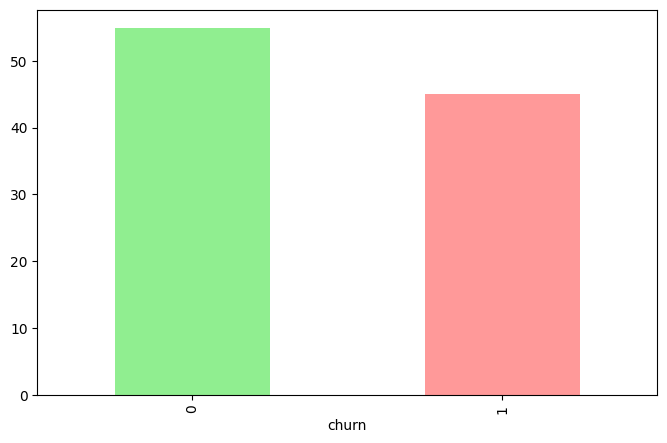

In [21]:
# Separamos las variables predictoras de la variable TARGET, que es la que queremos predecir.


dist =(df_entrenar[target].value_counts(normalize=True) * 100).round(2)
dist.plot(kind='bar', color=['#90EE90','#FF9999'], figsize=(8, 5)) 

permanencia_count = df_entrenar[target].value_counts()[0]
churn_count = df_entrenar[target].value_counts()[1]
total = churn_count + permanencia_count
print(f"Total: {total}")

print(f"Churn: {churn_count} ({dist[0]}%)")
print(f"Permanencia: {permanencia_count} ({dist[1]}%)")



### Analisis univariable

### Variables numéricas

figure rev


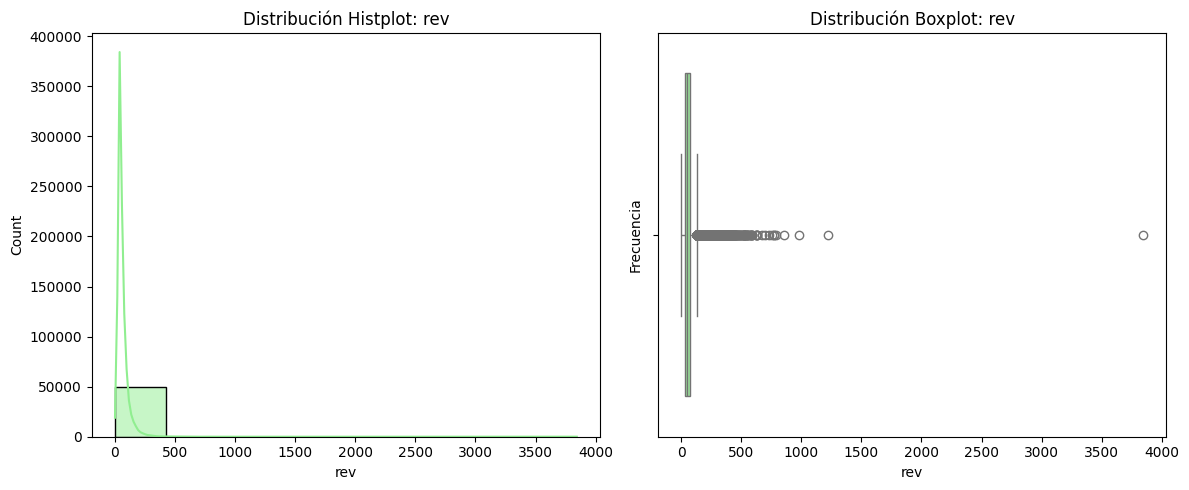

figure mou


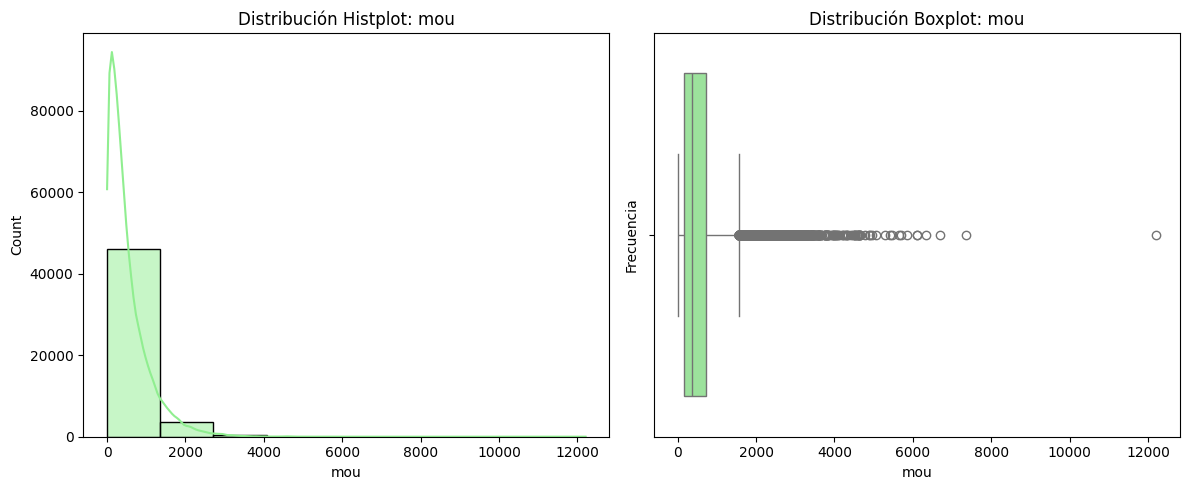

figure totmrc


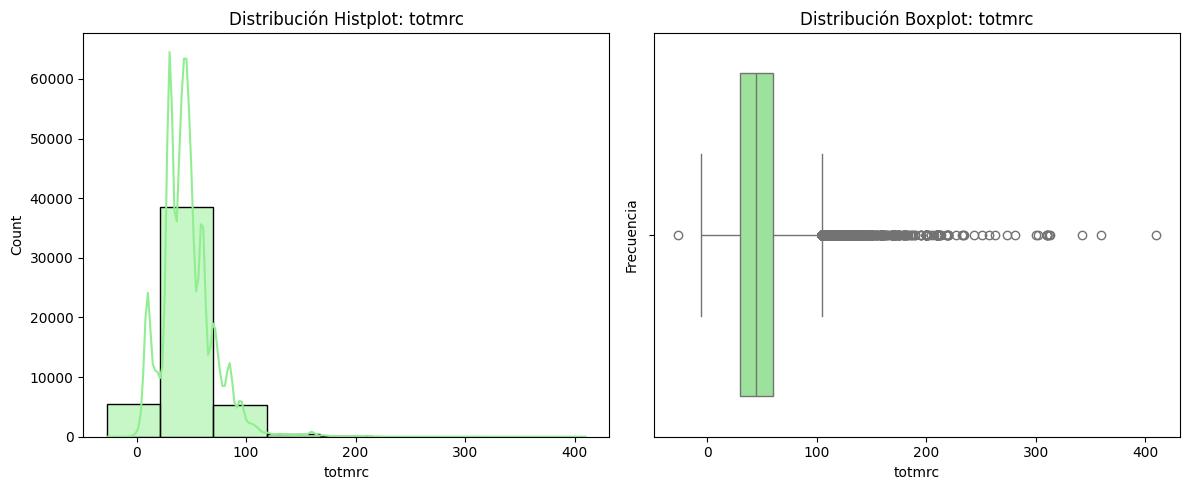

figure ovrmou


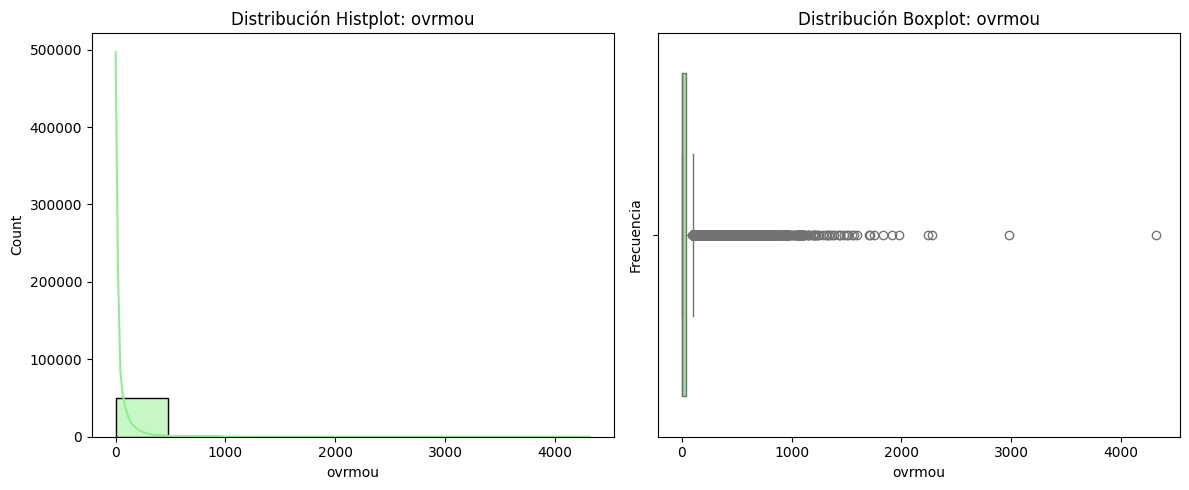

figure ovrrev


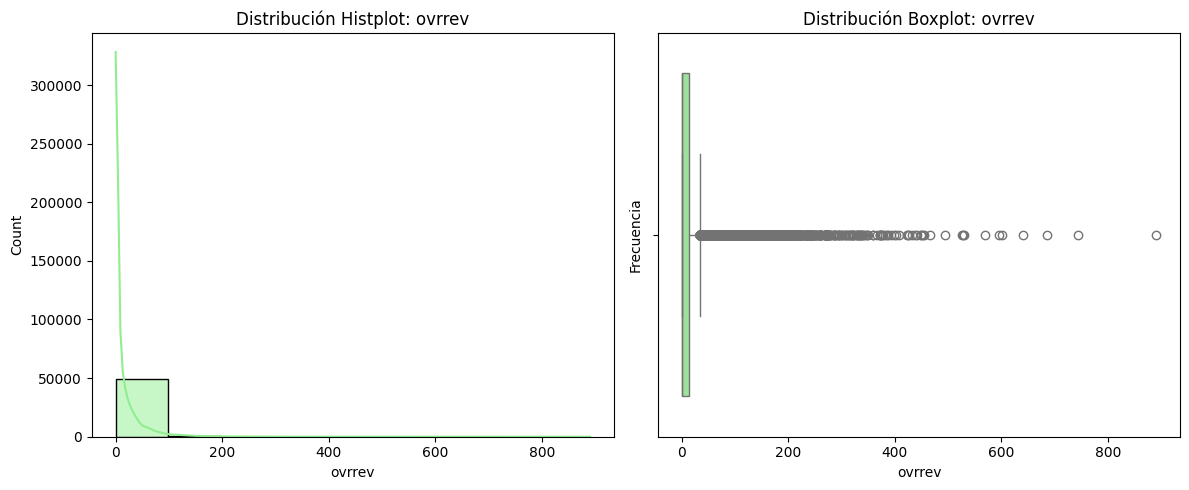

figure vceovr


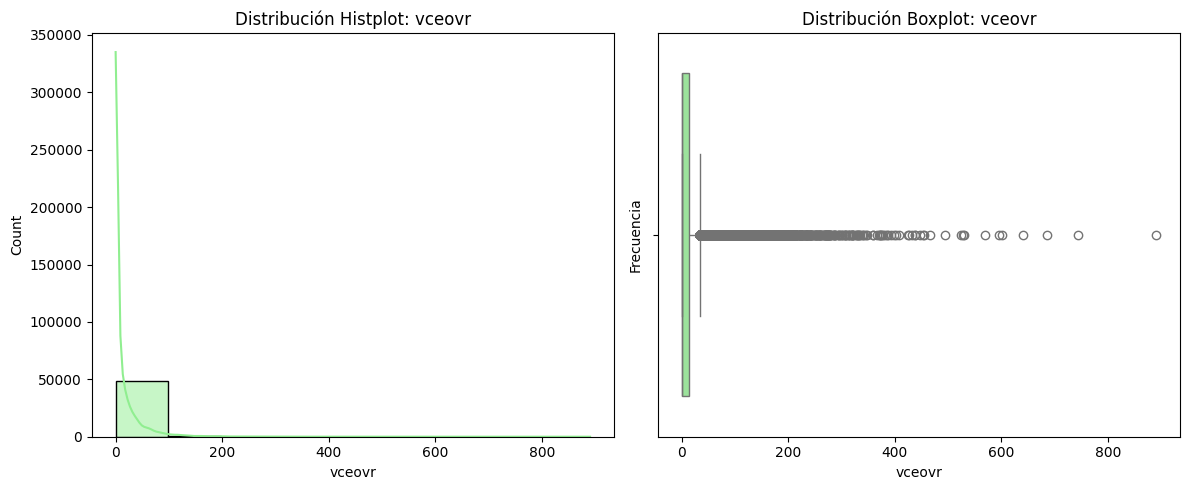

figure roam


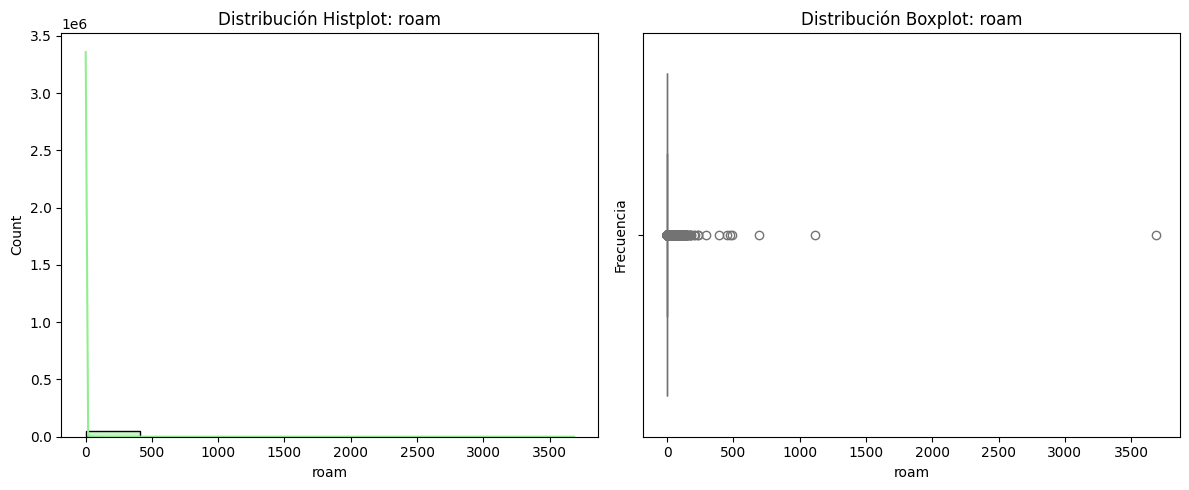

figure change_mou


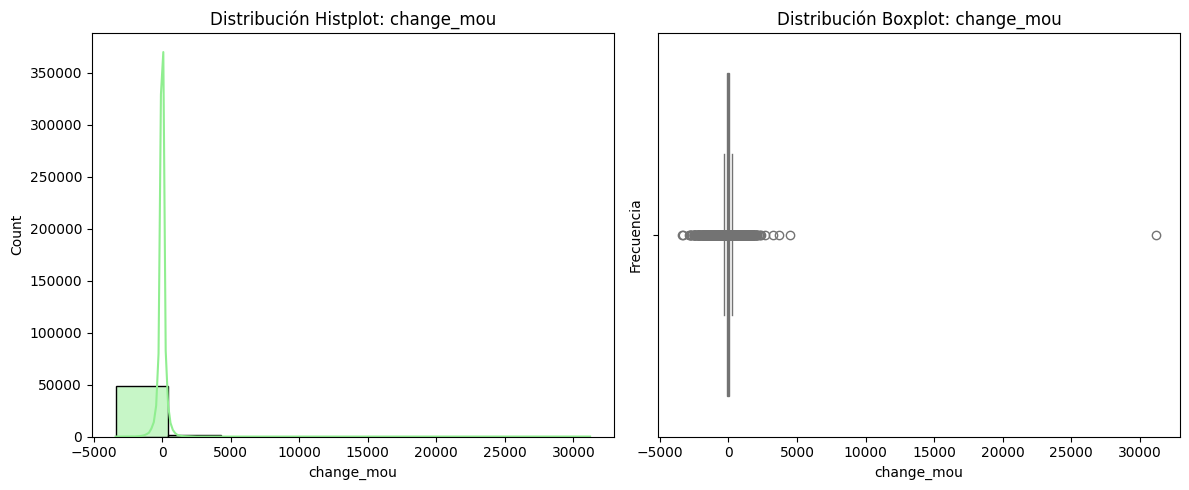

figure change_rev


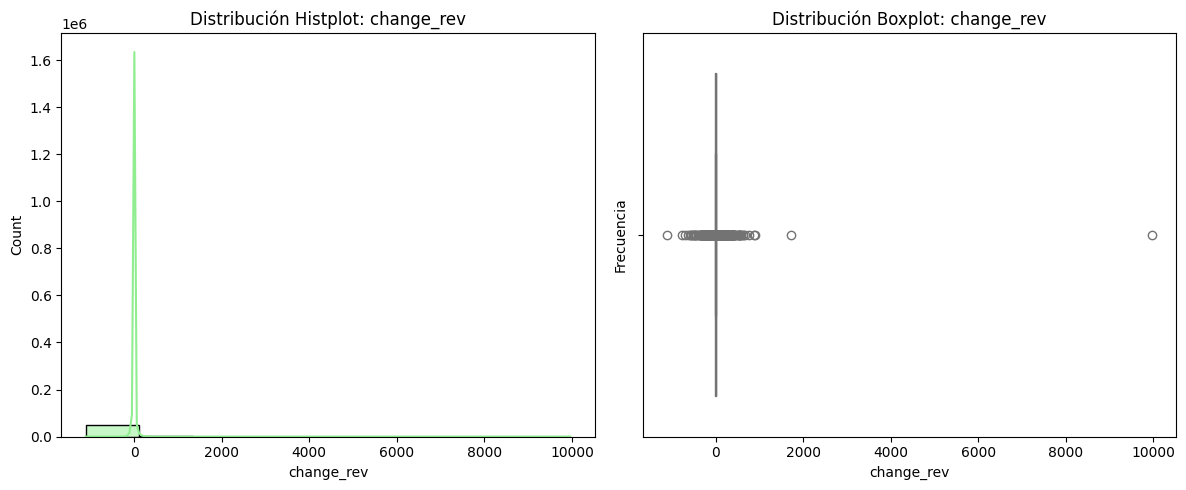

figure drop_vce


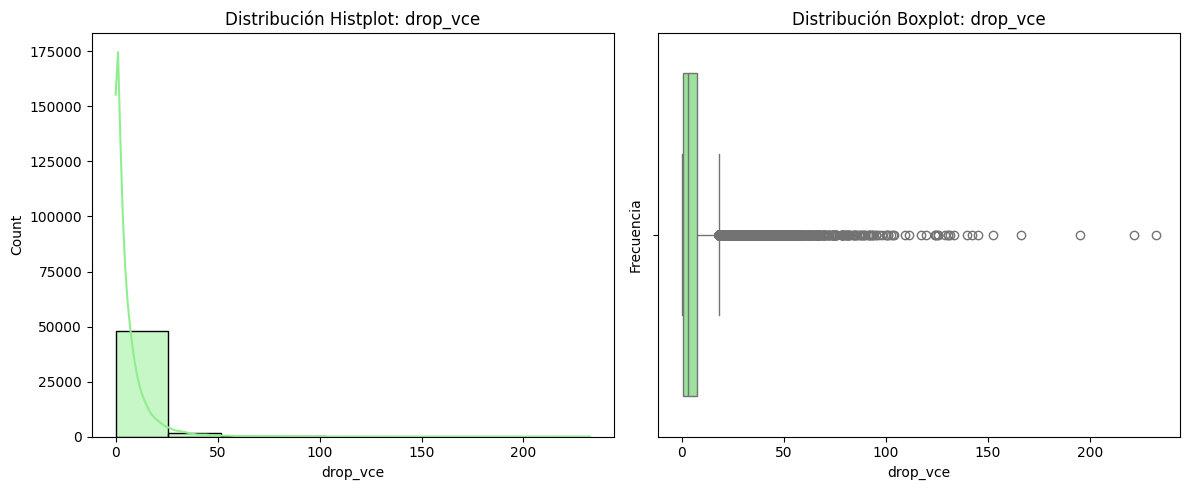

figure blck_vce


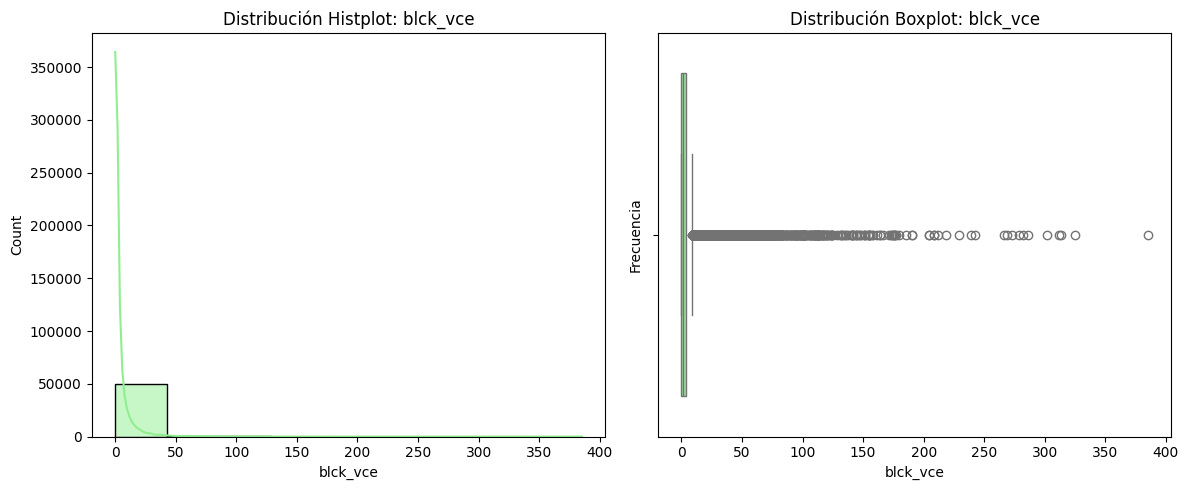

figure blck_dat


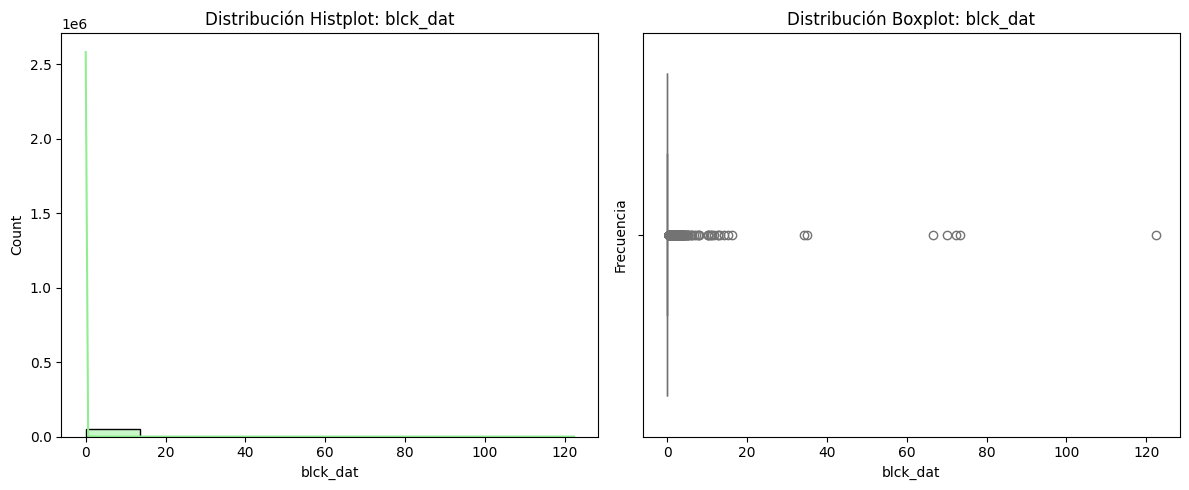

figure unan_vce


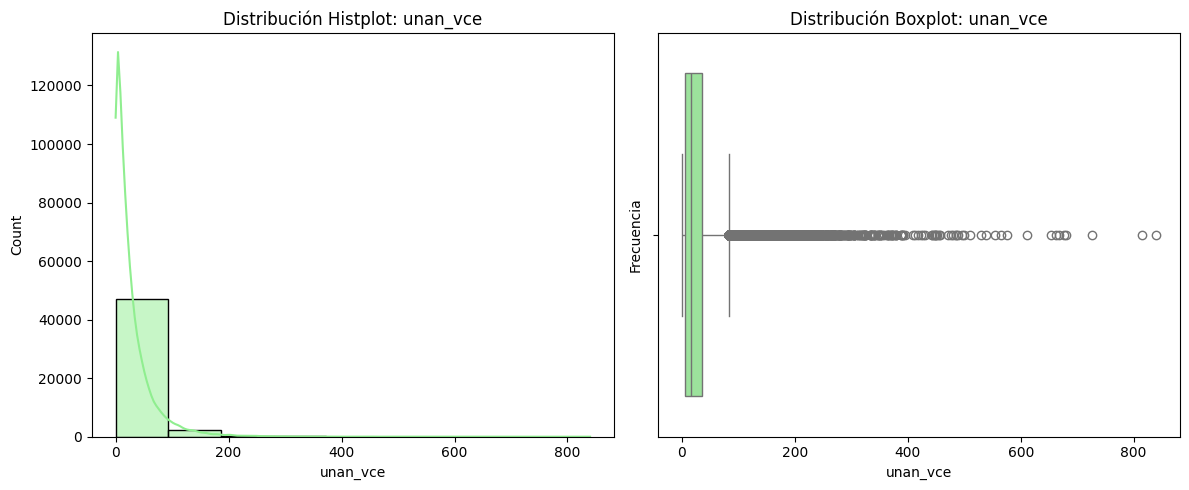

figure plcd_vce


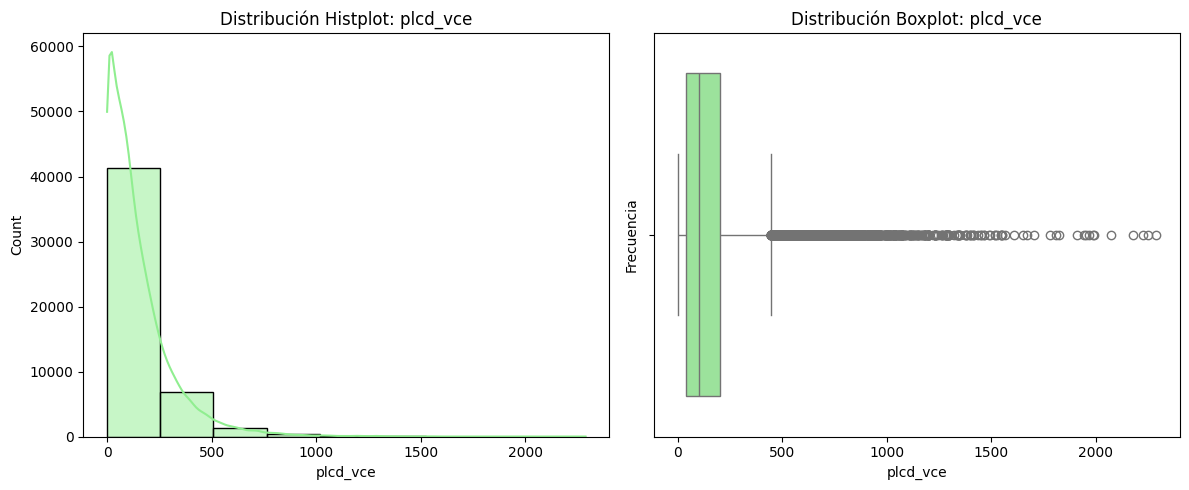

figure recv_vce


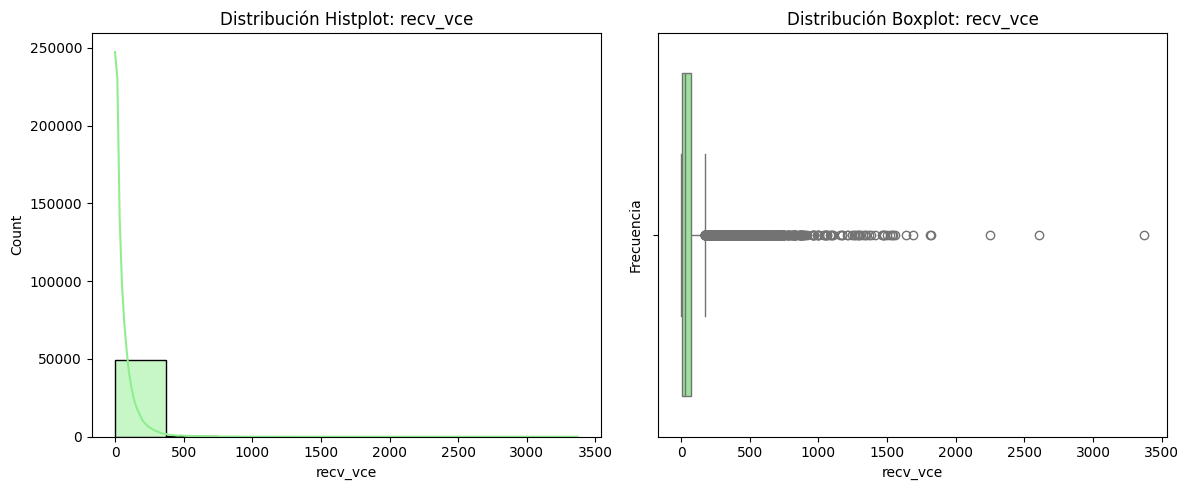

figure comp_vce


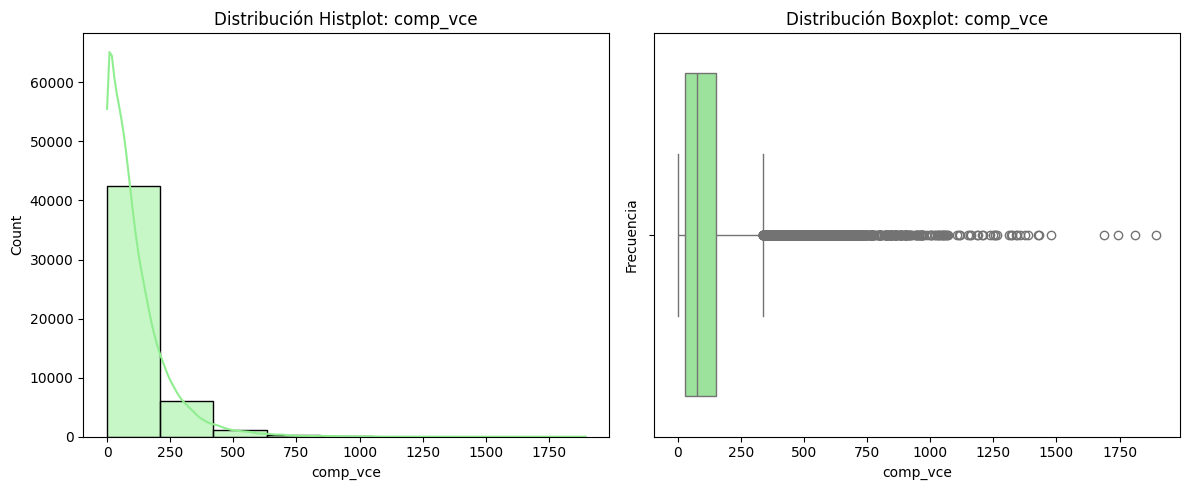

figure comp_dat


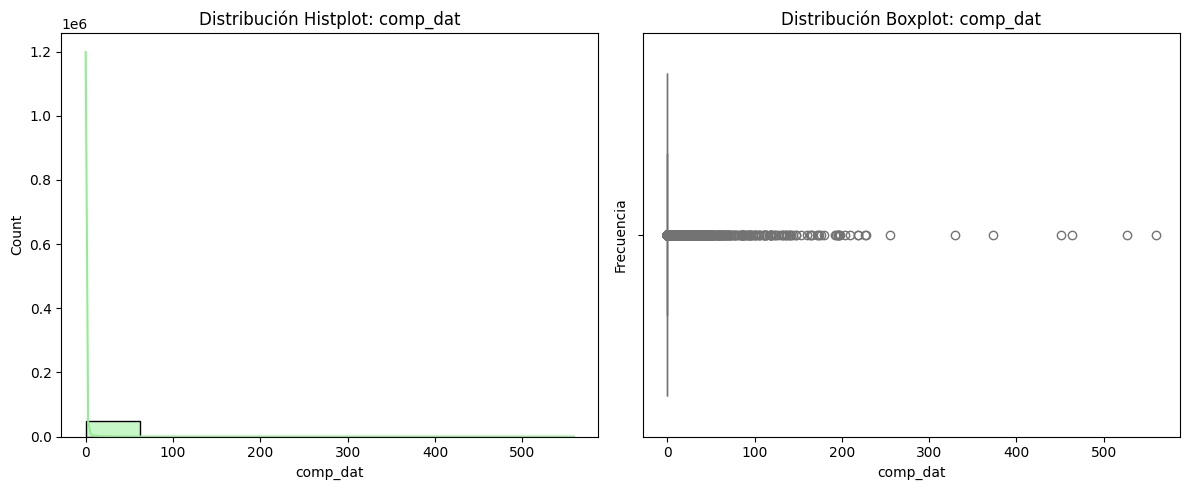

figure custcare


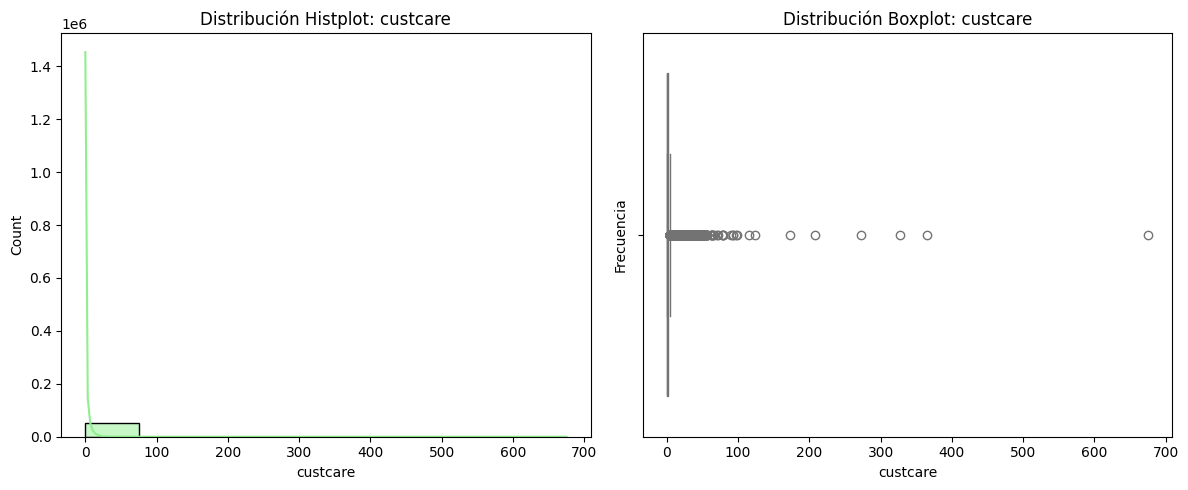

figure ccrndmou


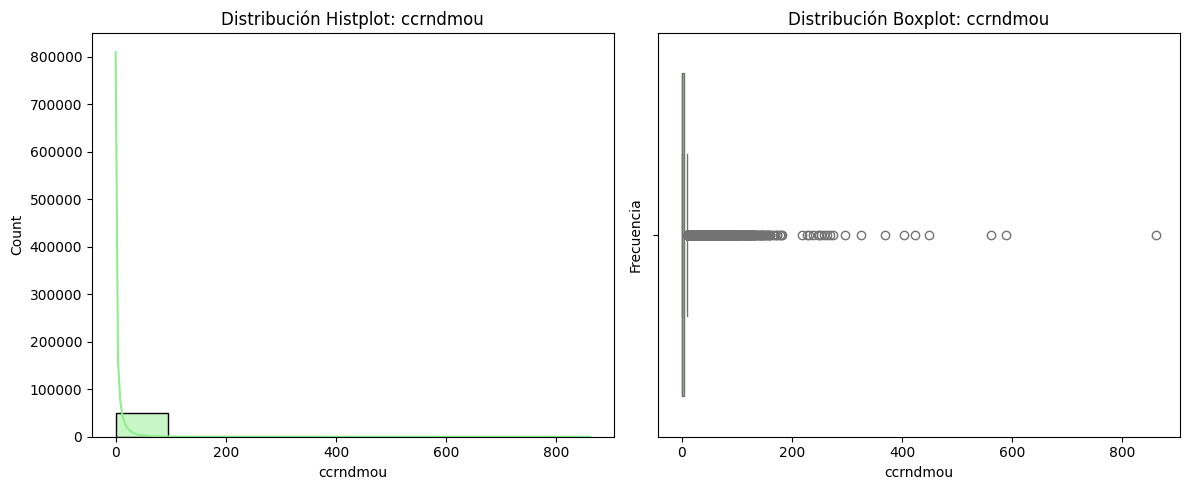

figure cc_mou


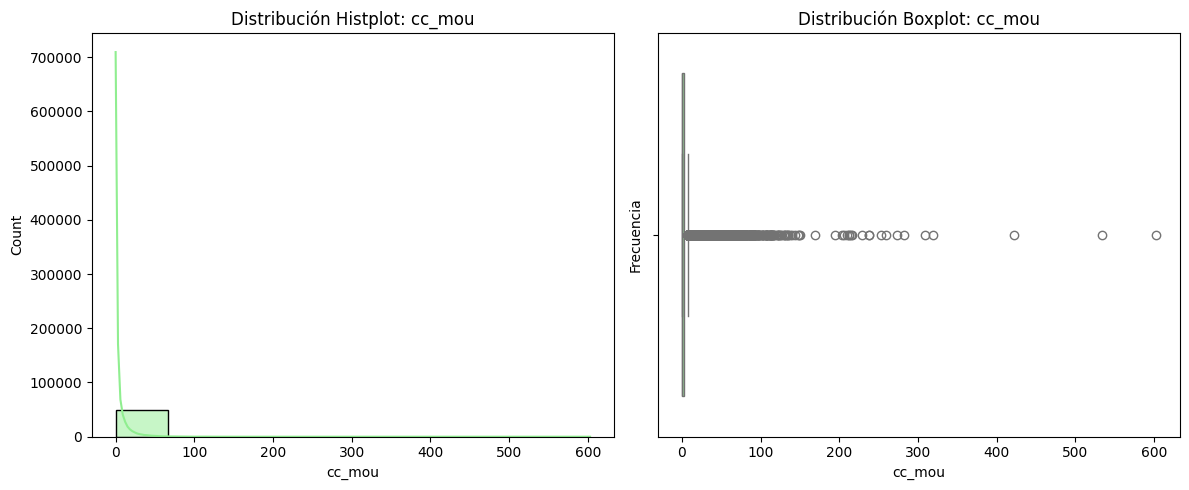

figure inonemin


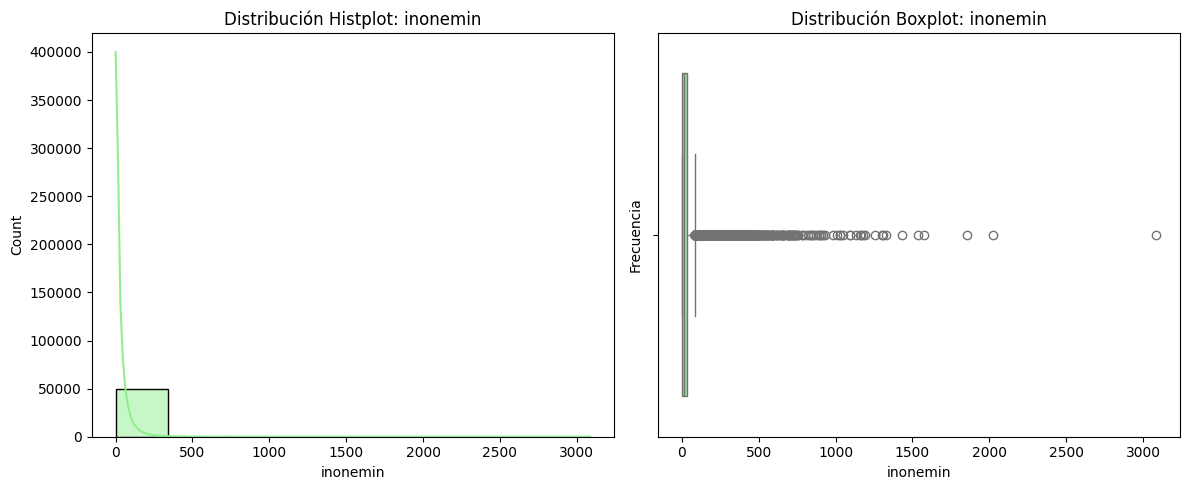

figure threeway


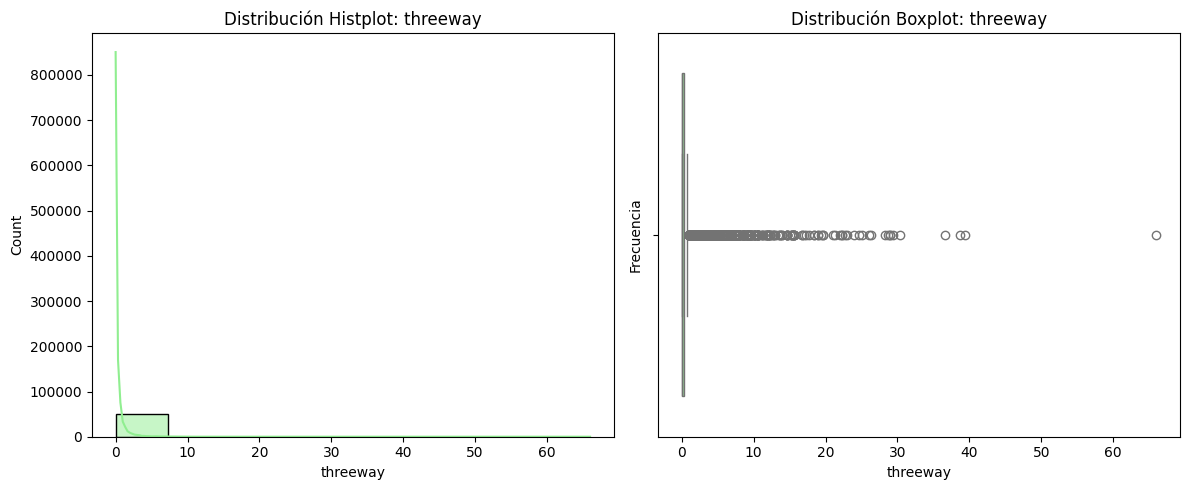

figure mou_cvce


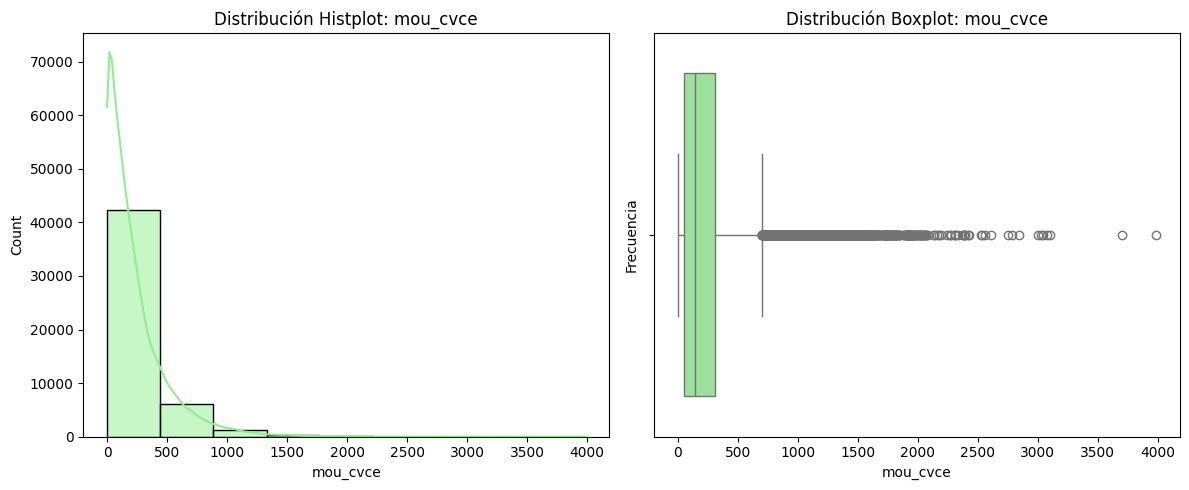

figure mou_rvce


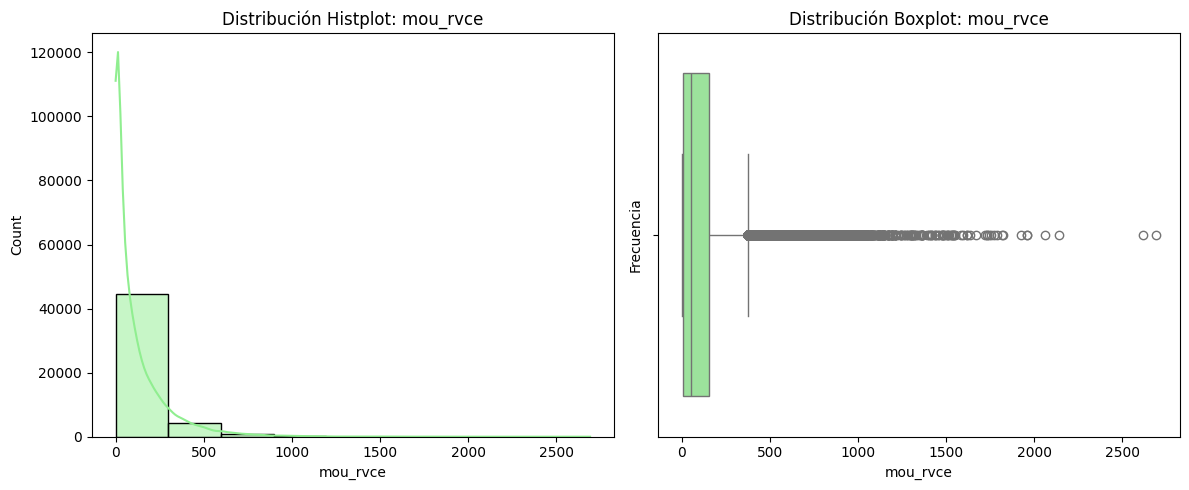

figure owylis_vce


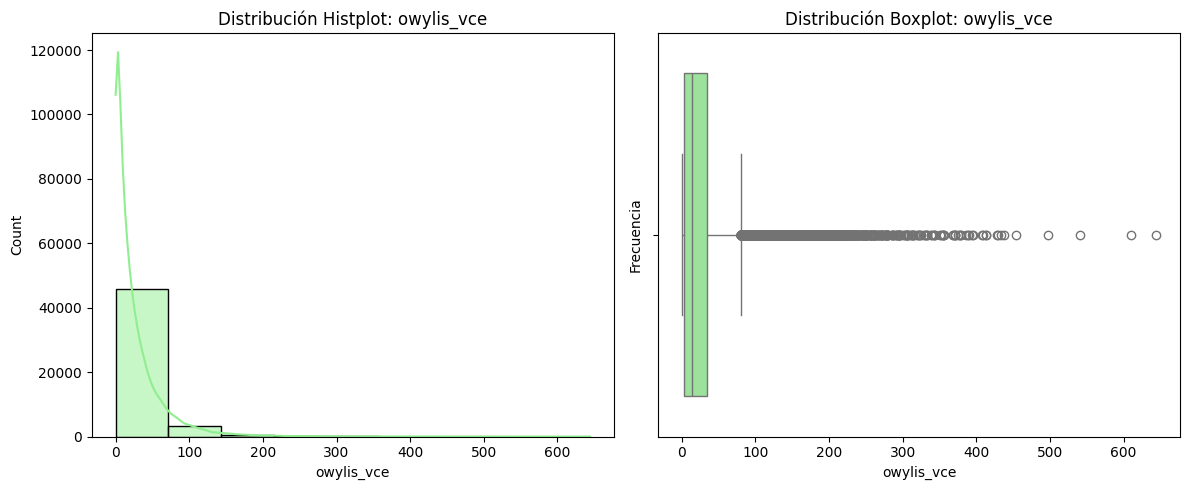

figure mouowylisv


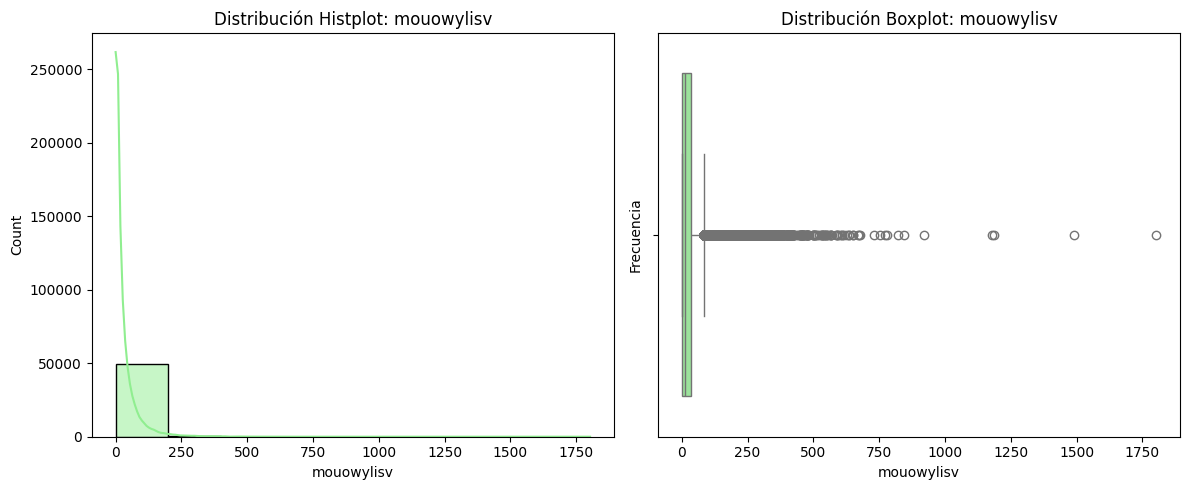

figure iwylis_vce


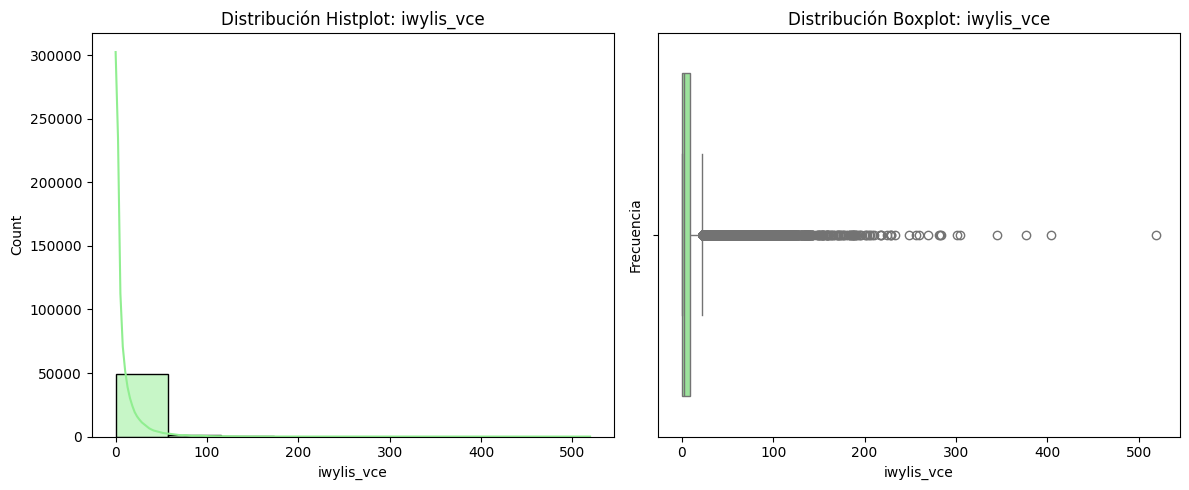

figure mouiwylisv


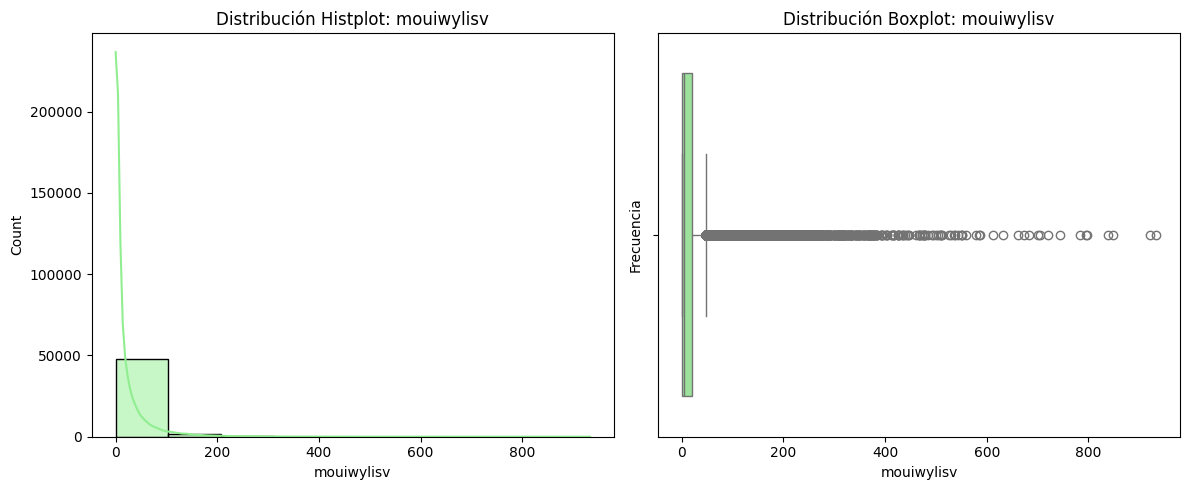

figure peak_vce


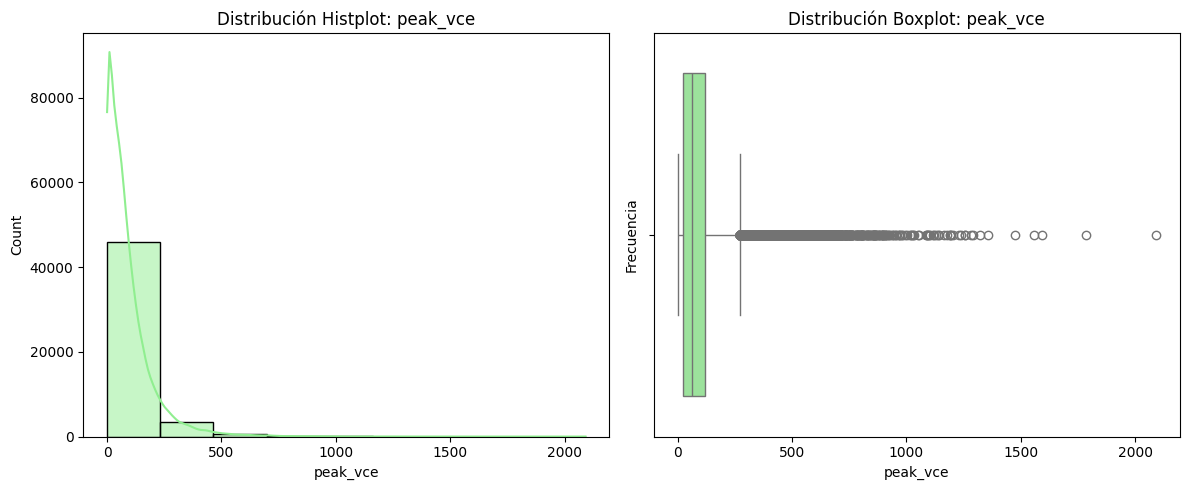

figure peak_dat


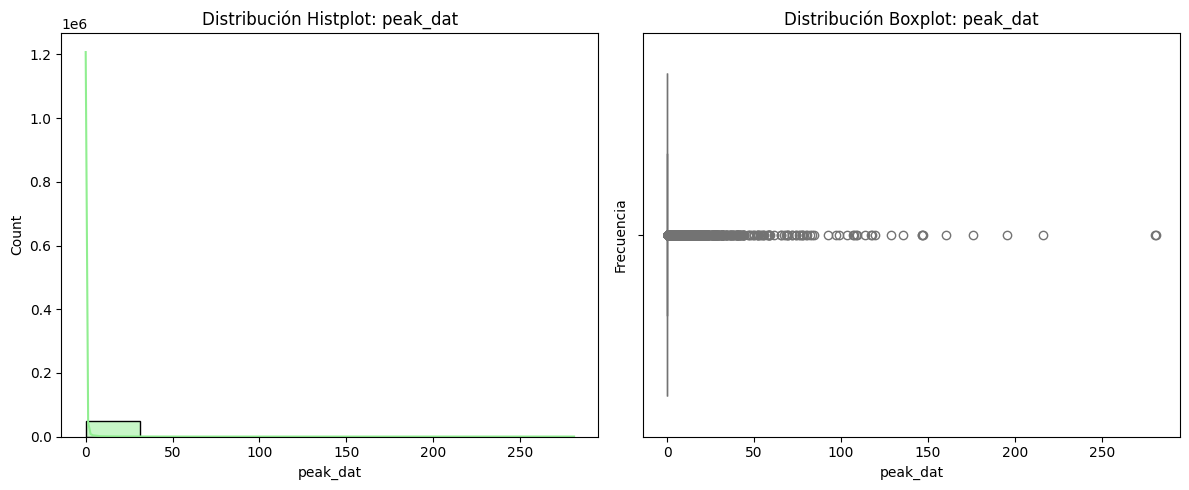

figure mou_peav


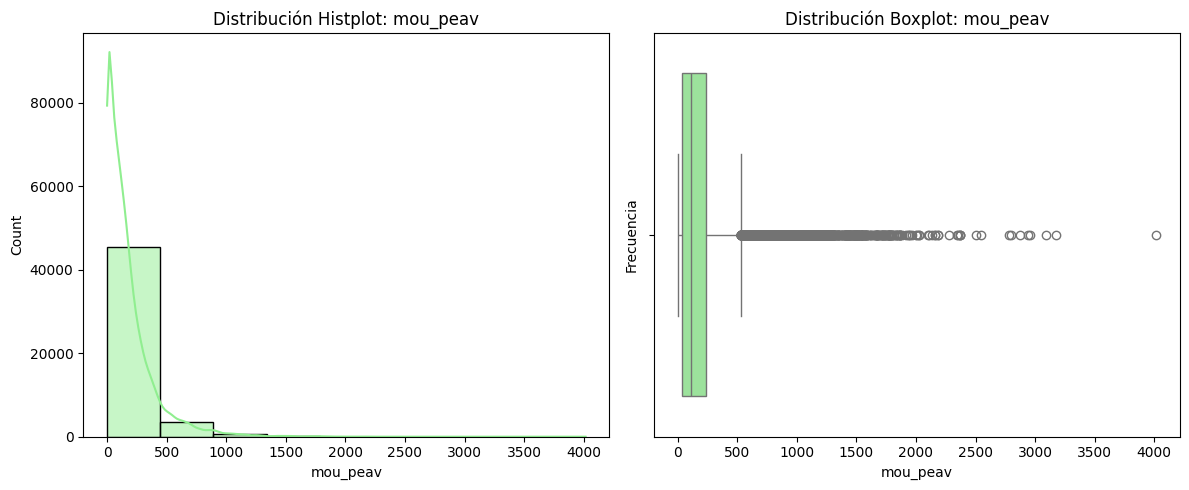

figure opk_vce


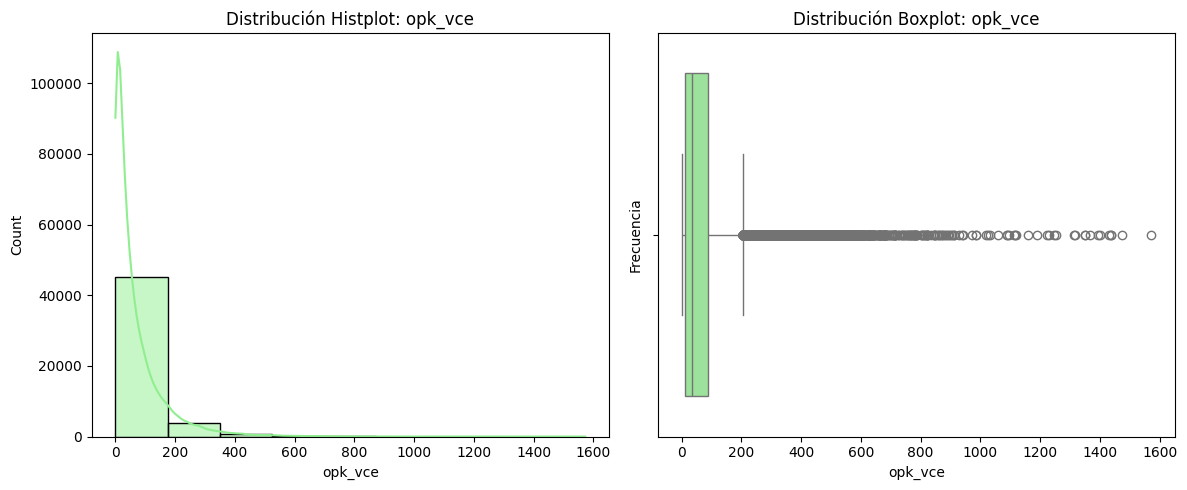

figure opk_dat


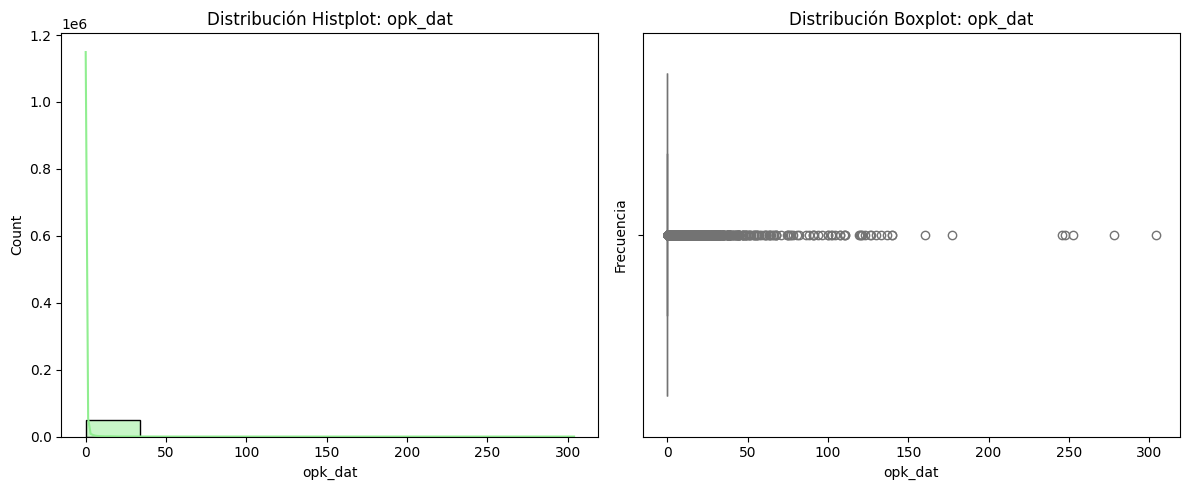

figure mou_opkv


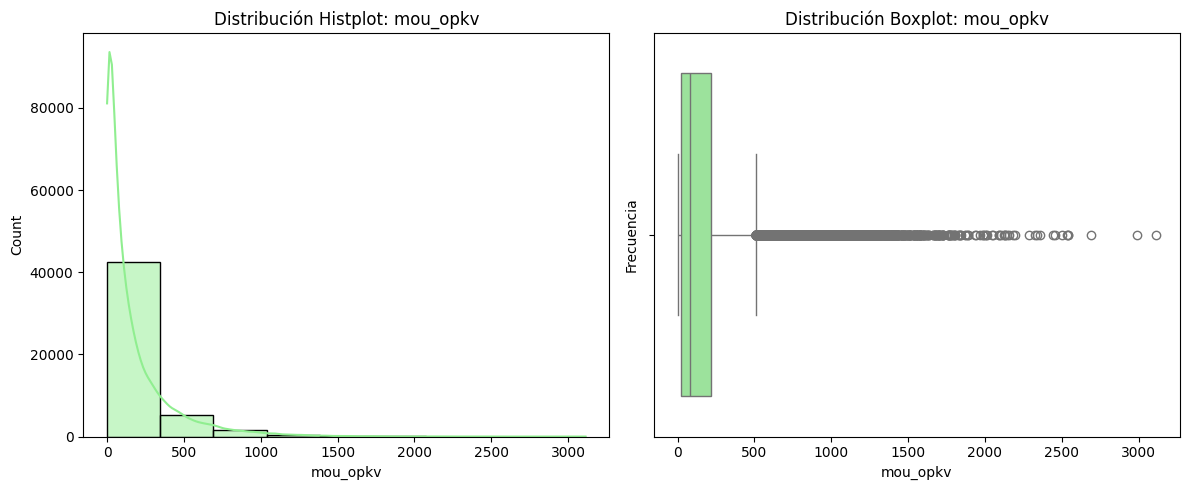

figure mou_opkd


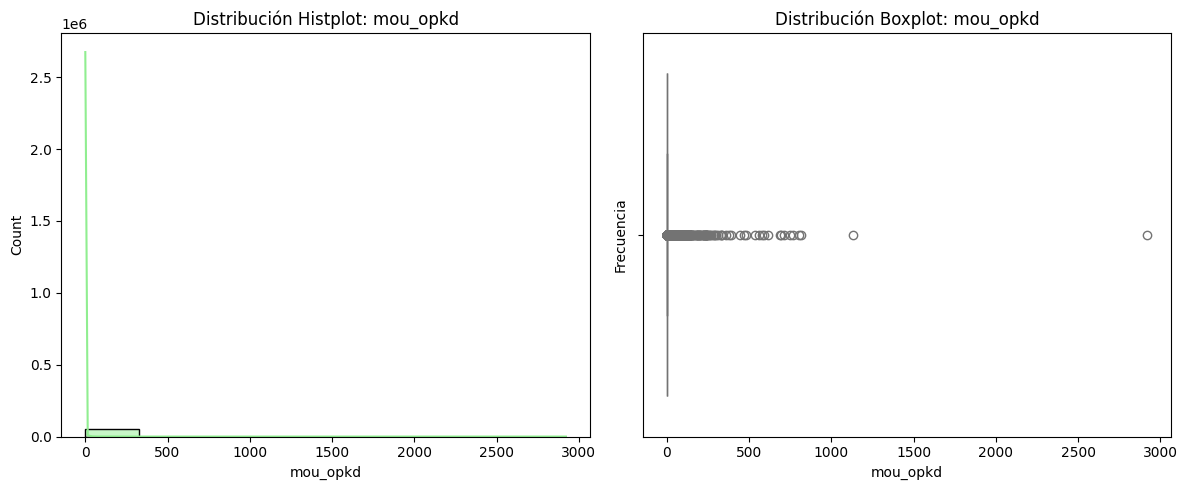

figure drop_blk


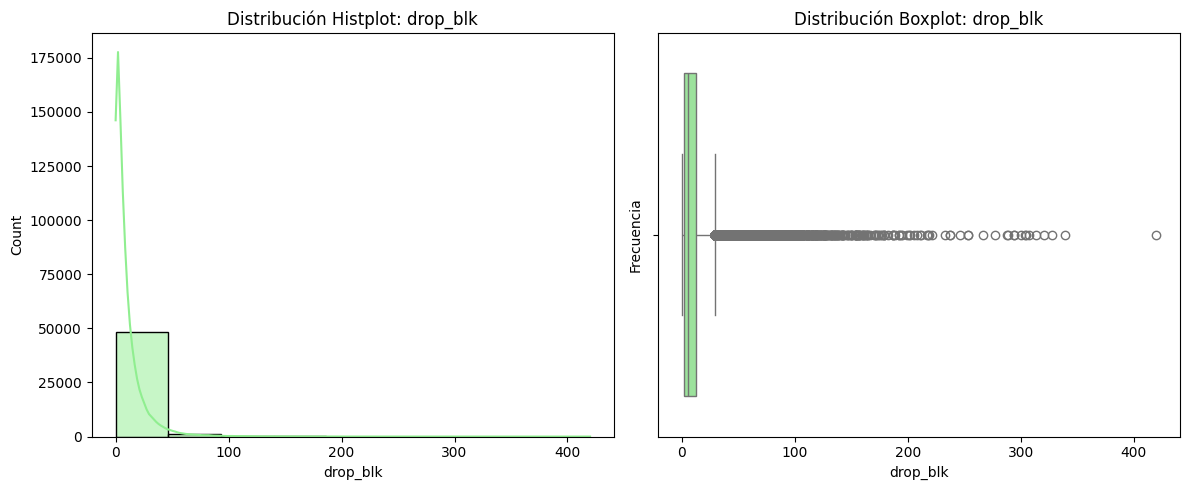

figure attempt


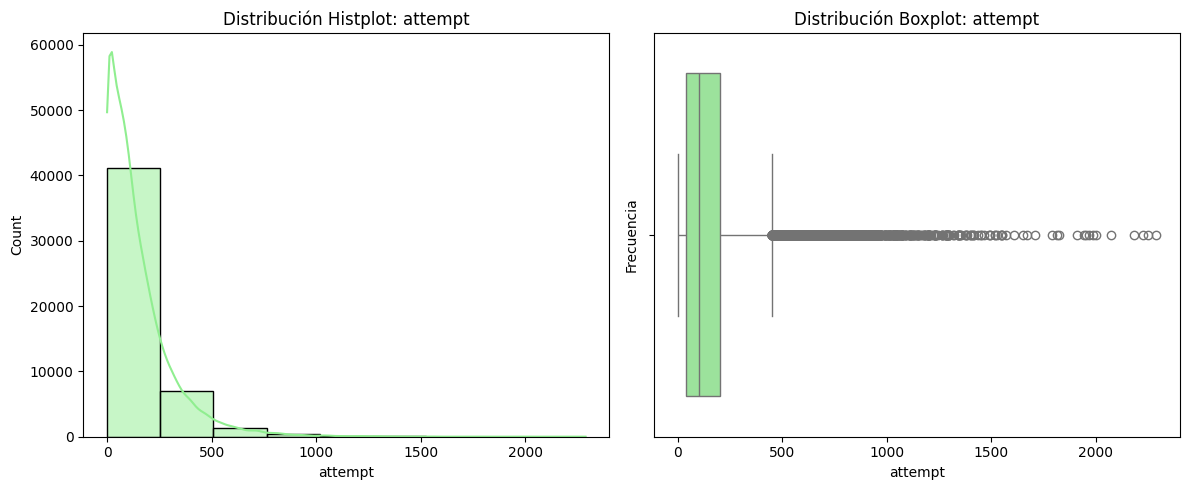

figure complete


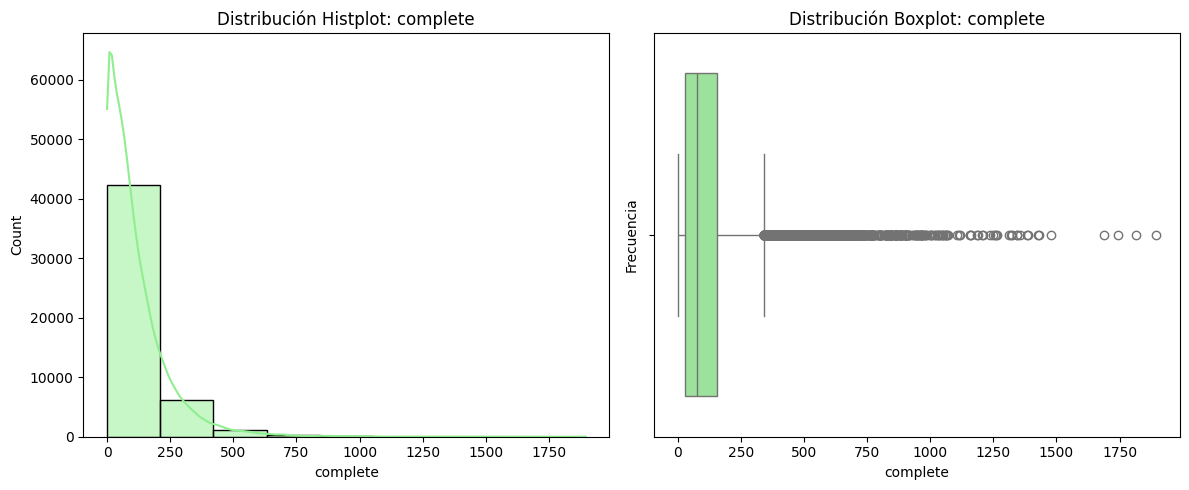

figure callwait


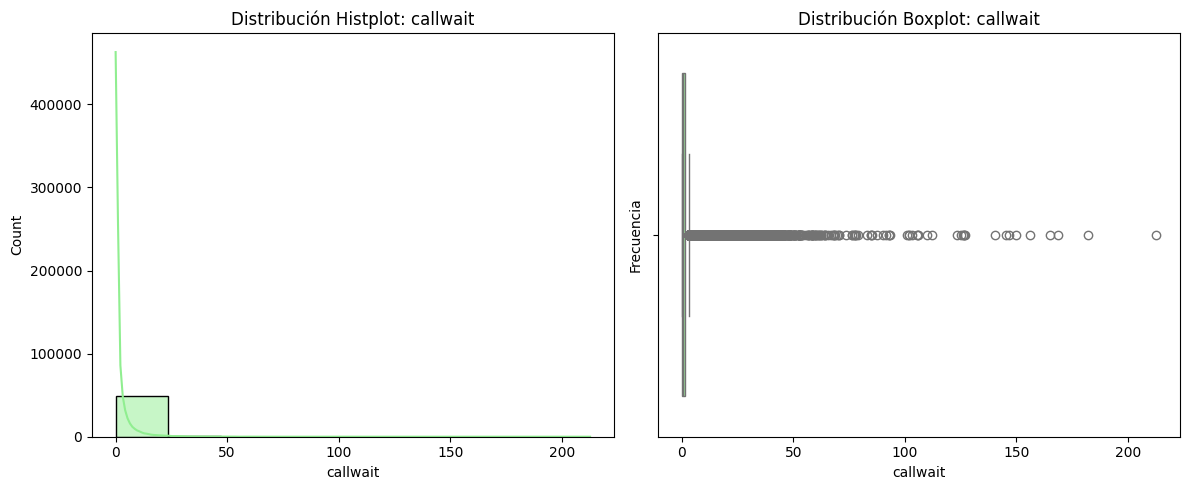

figure months


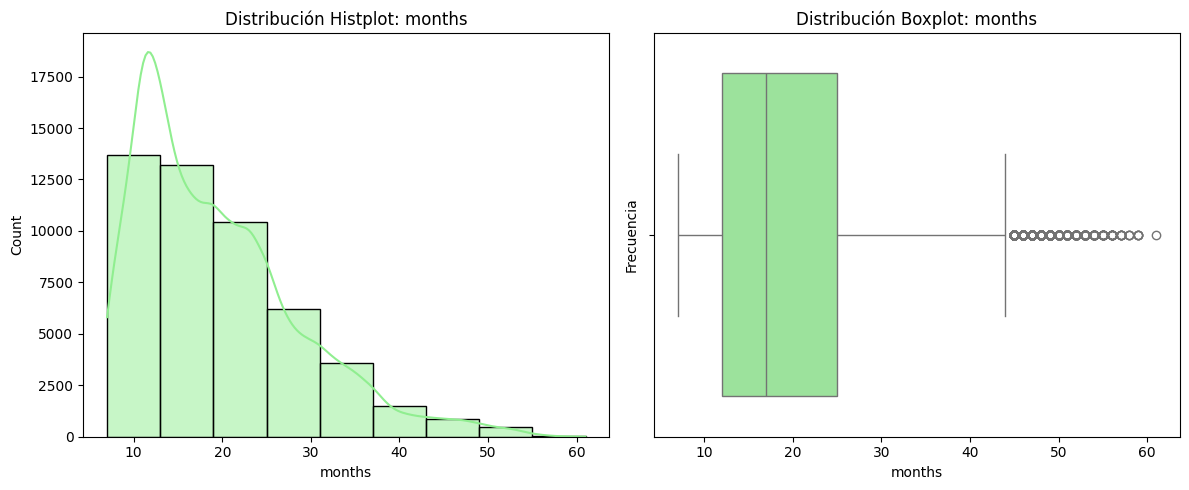

figure uniqsubs


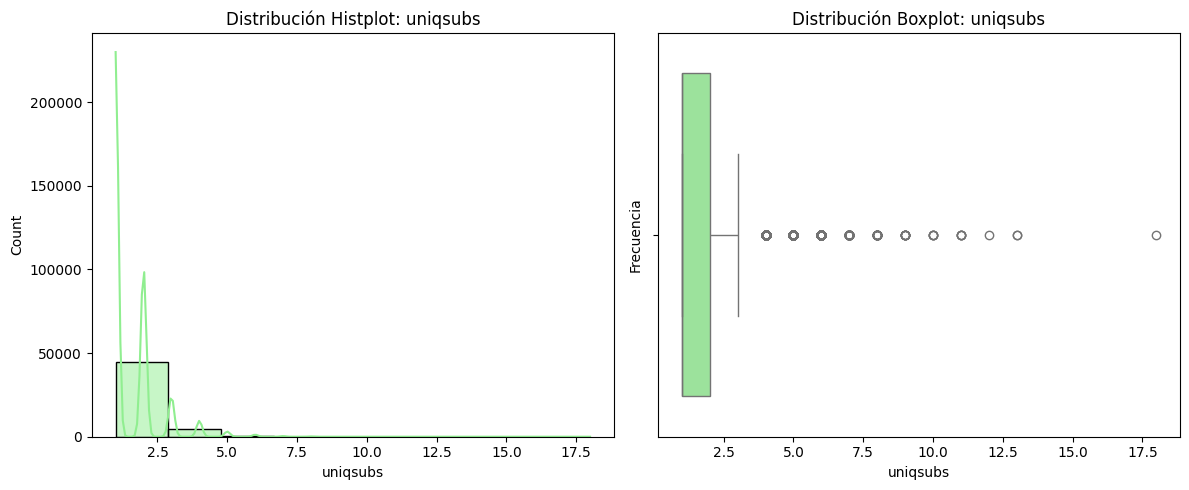

figure actvsubs


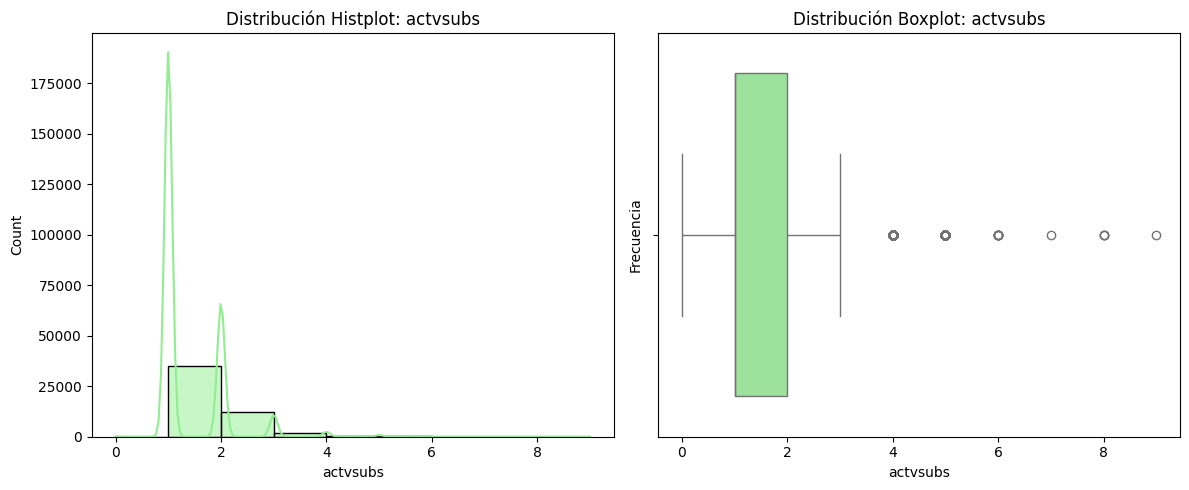

figure totcalls


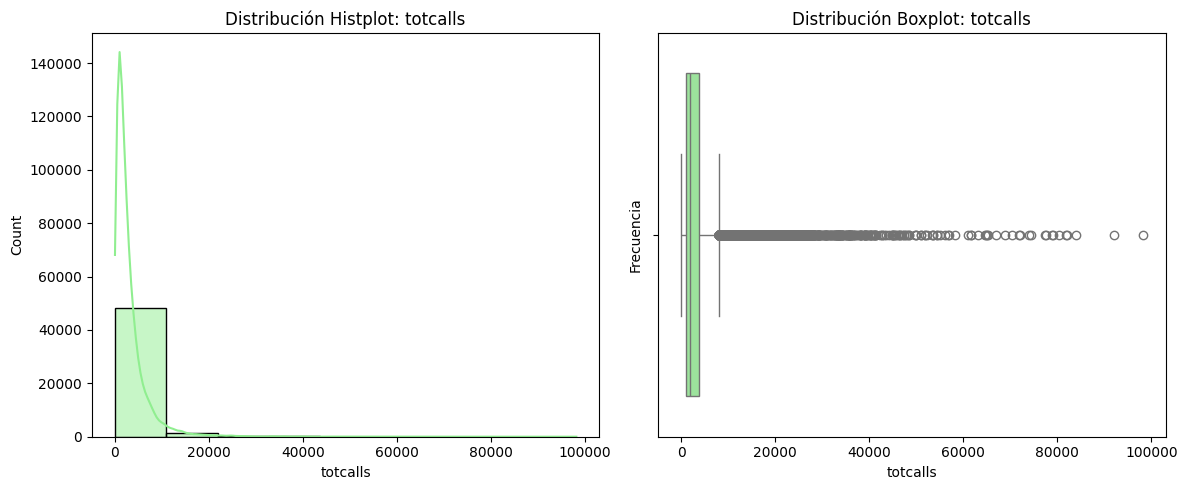

figure totmou


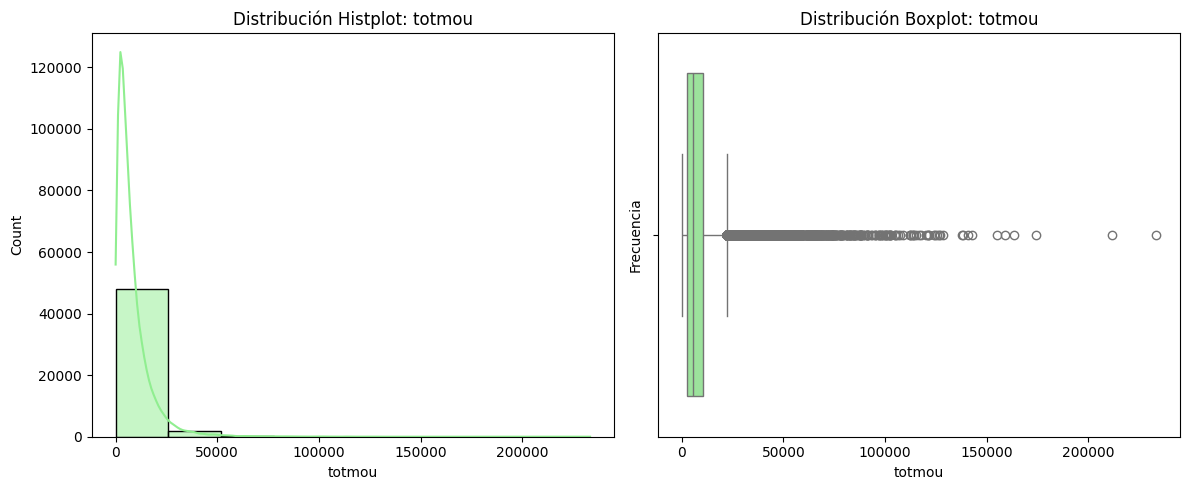

figure totrev


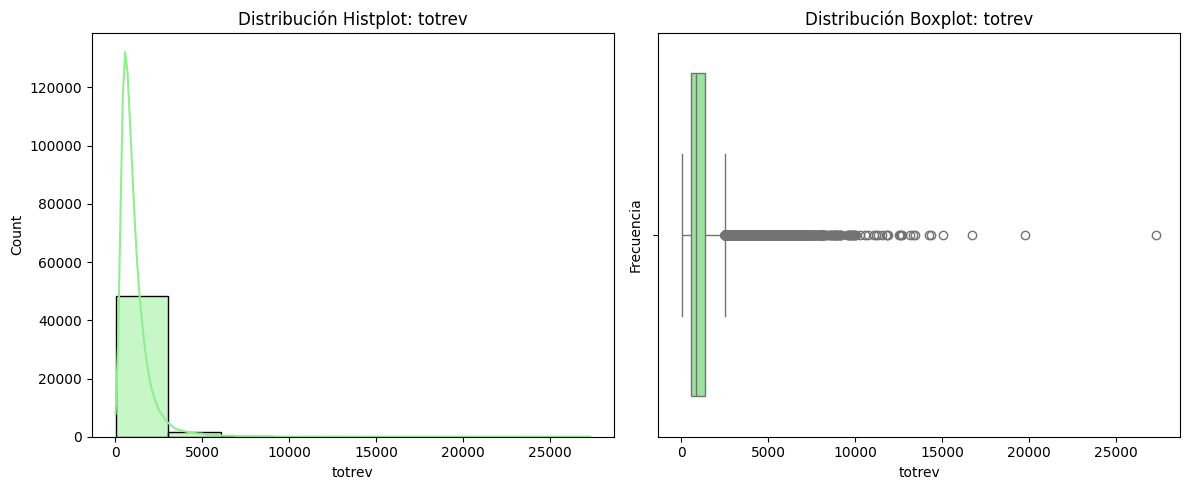

figure adjrev


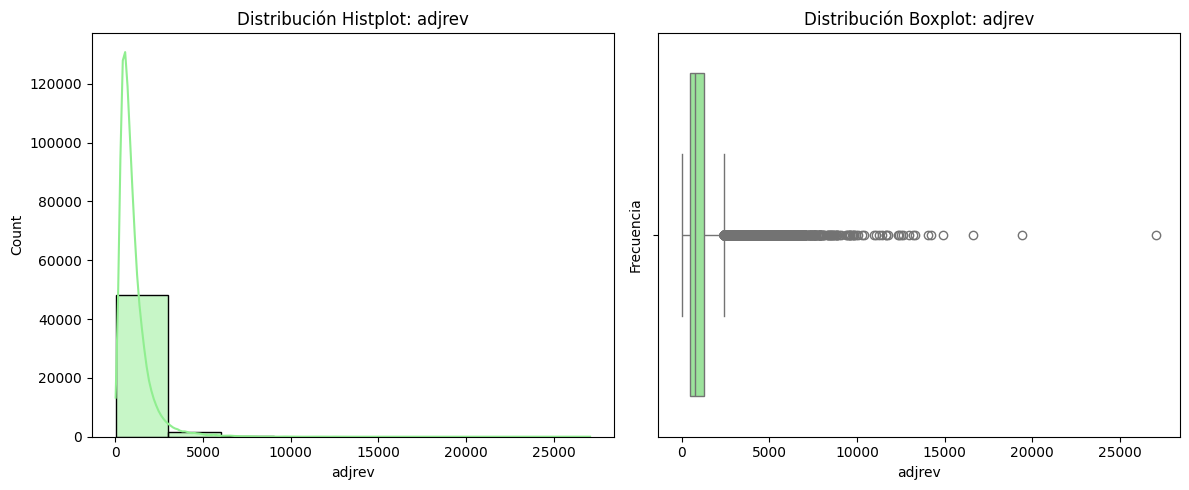

figure adjmou


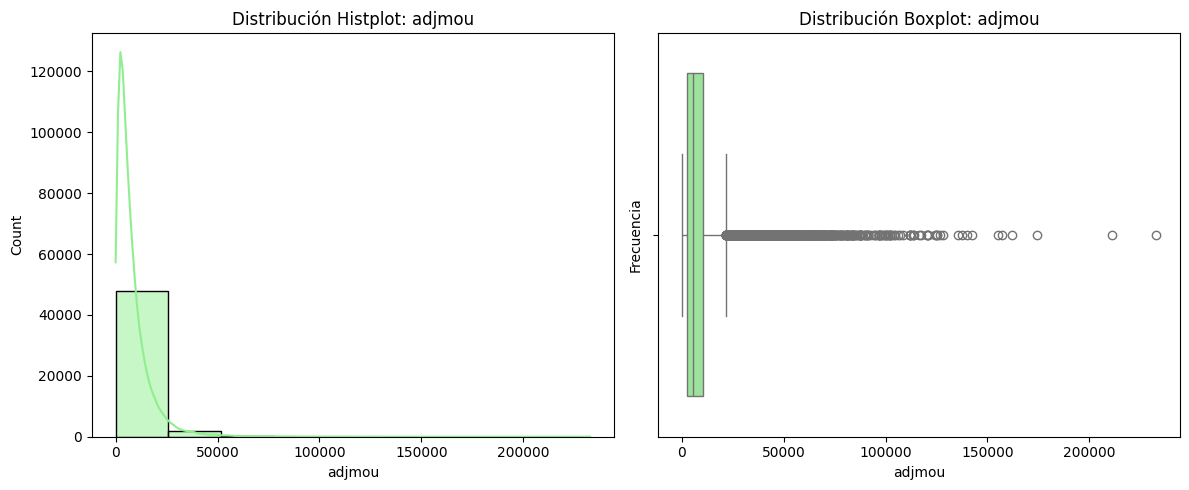

figure adjqty


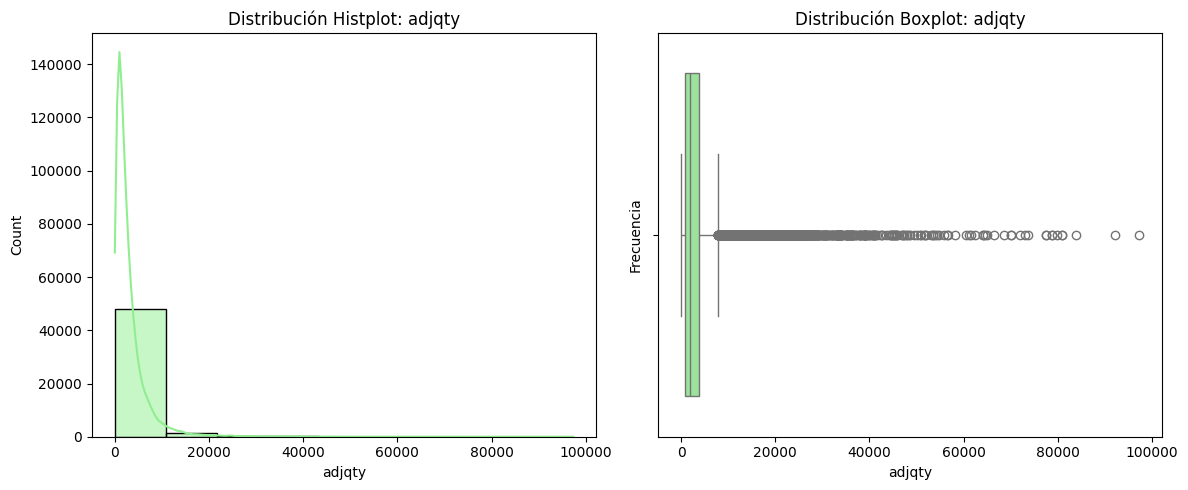

figure avgrev


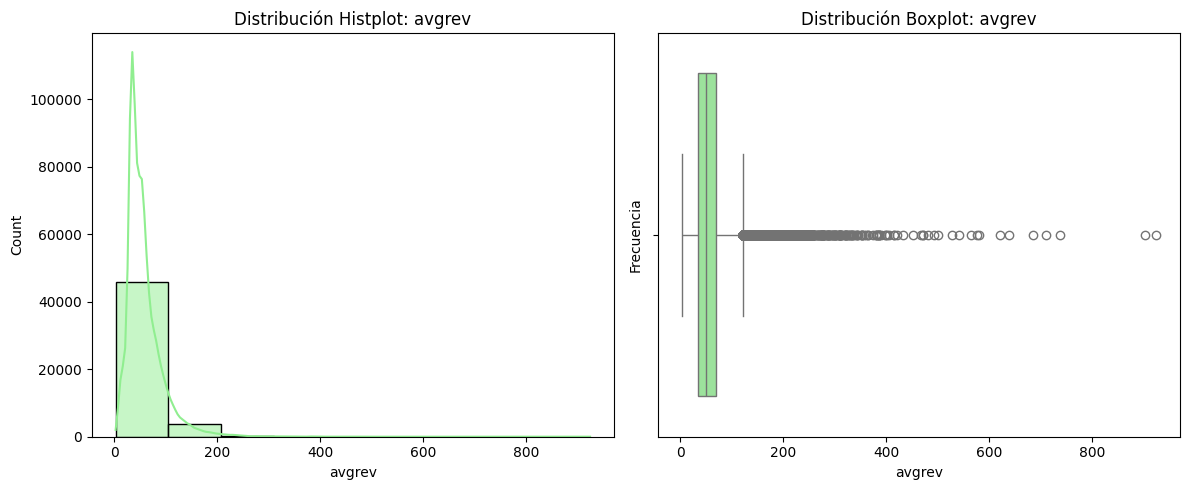

figure avgmou


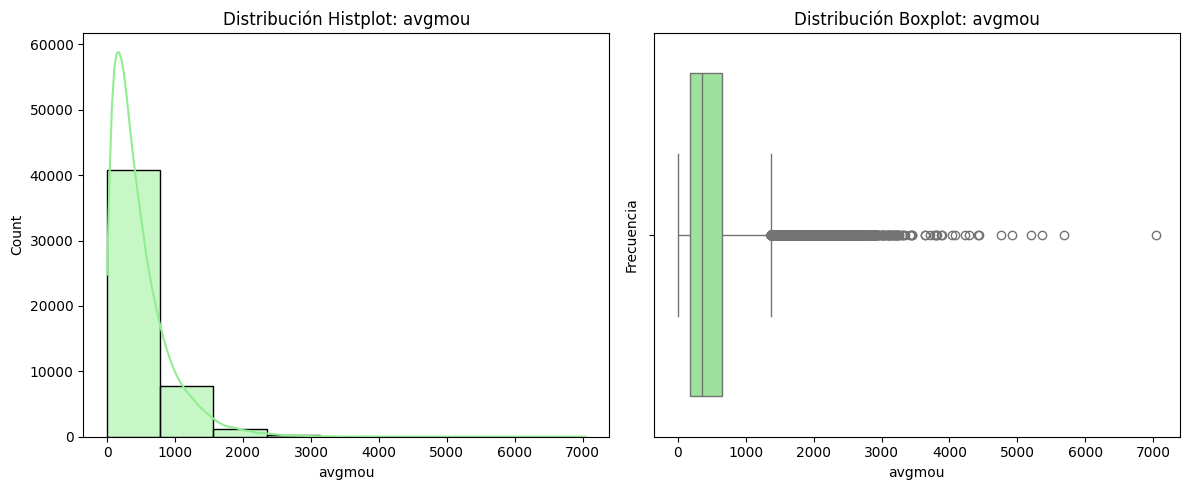

figure avgqty


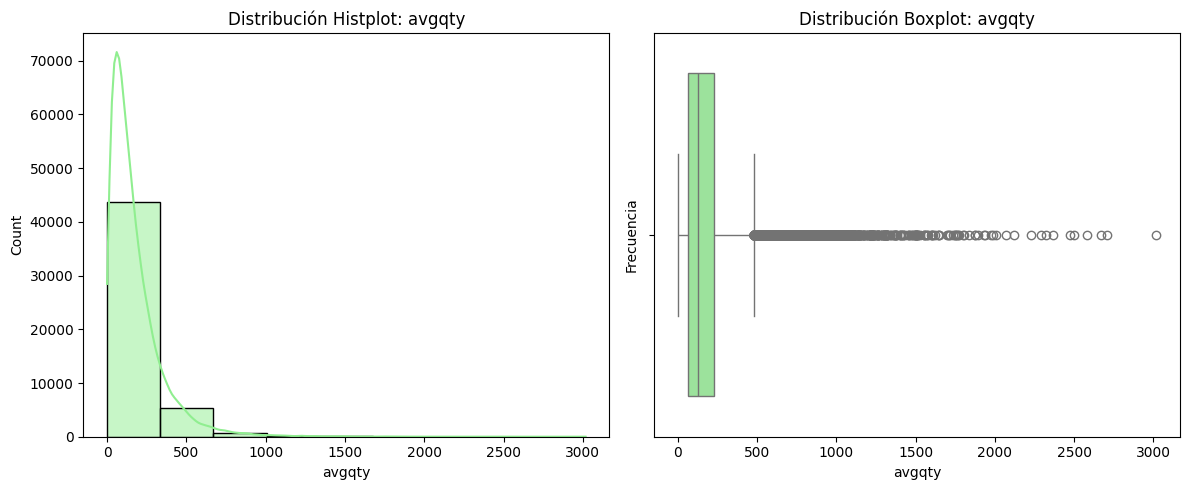

figure avg3mou


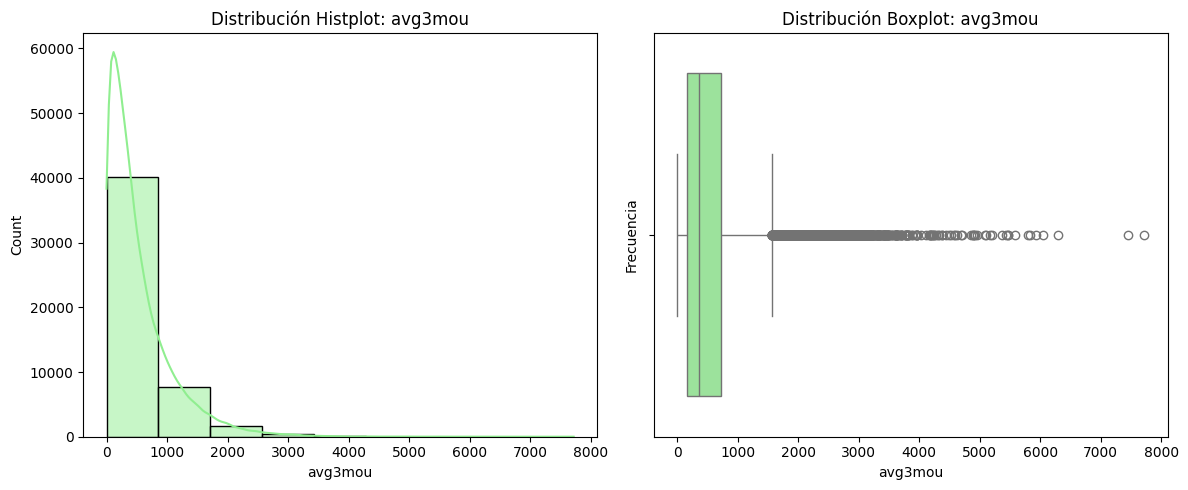

figure avg3qty


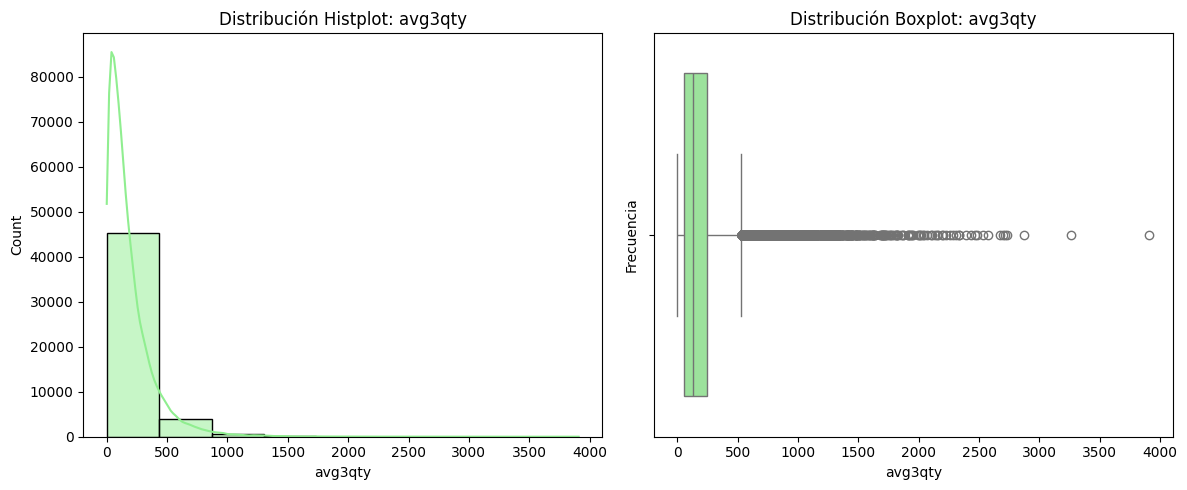

figure avg3rev


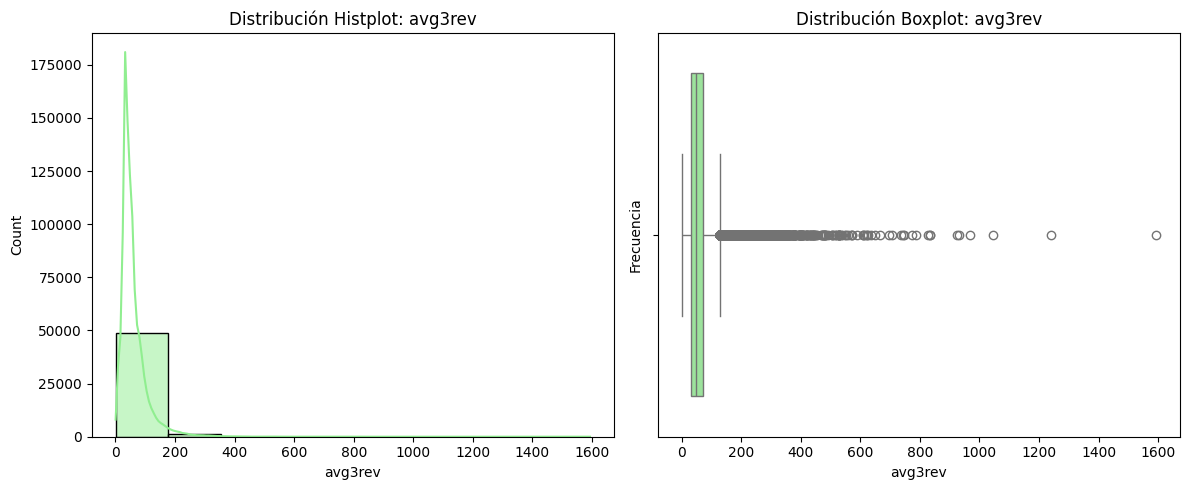

figure avg6mou


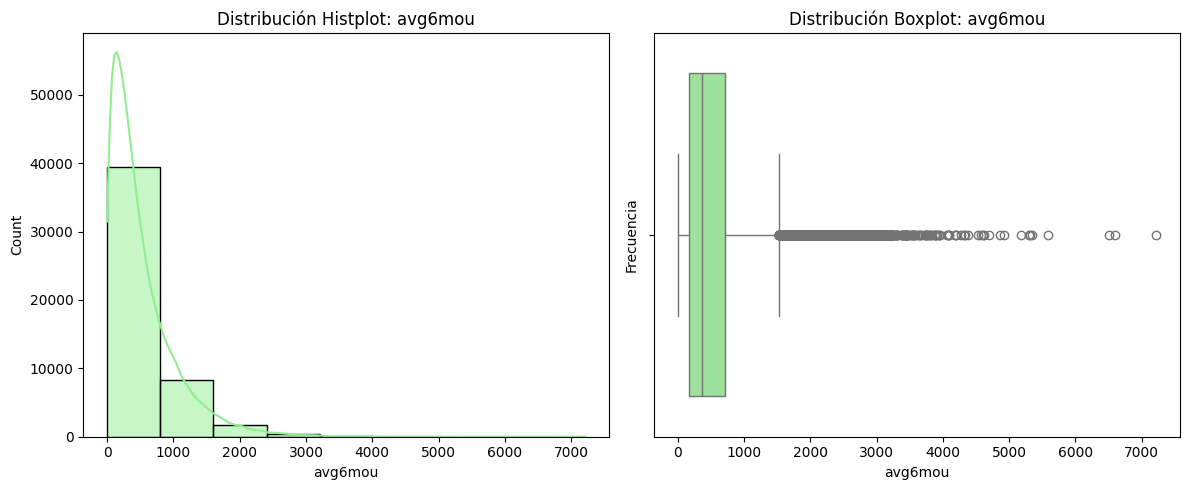

figure avg6qty


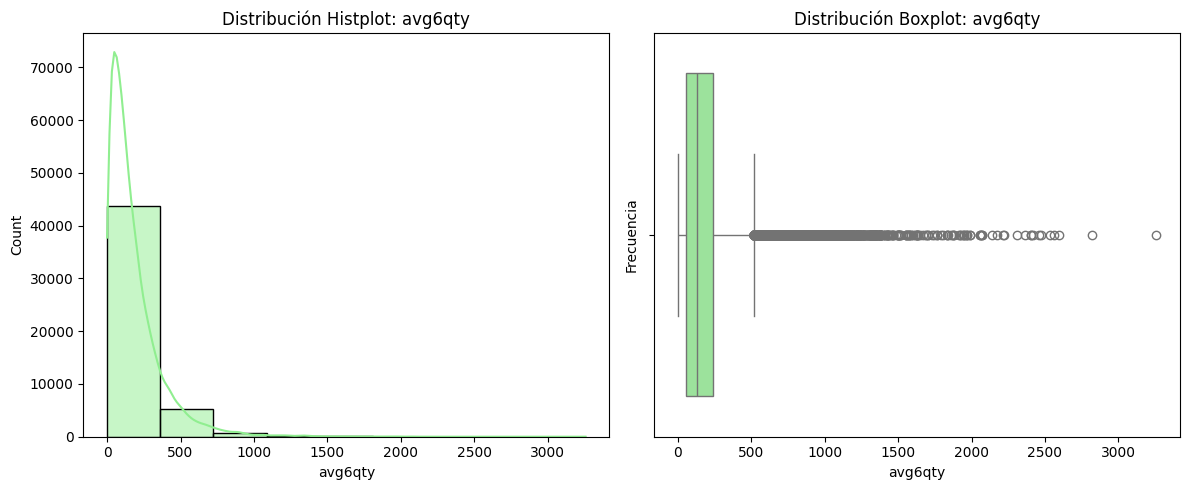

figure avg6rev


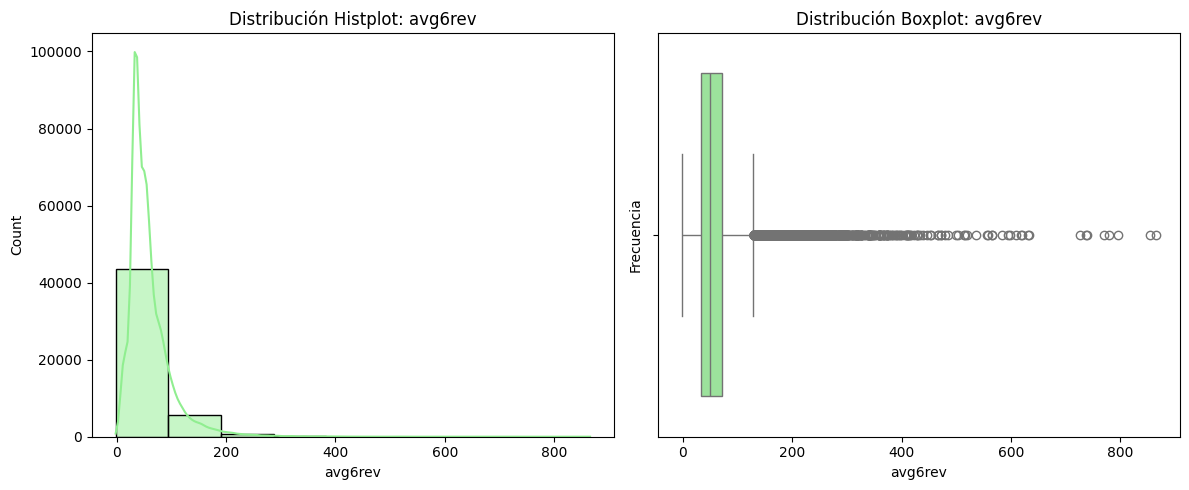

figure hnd_price


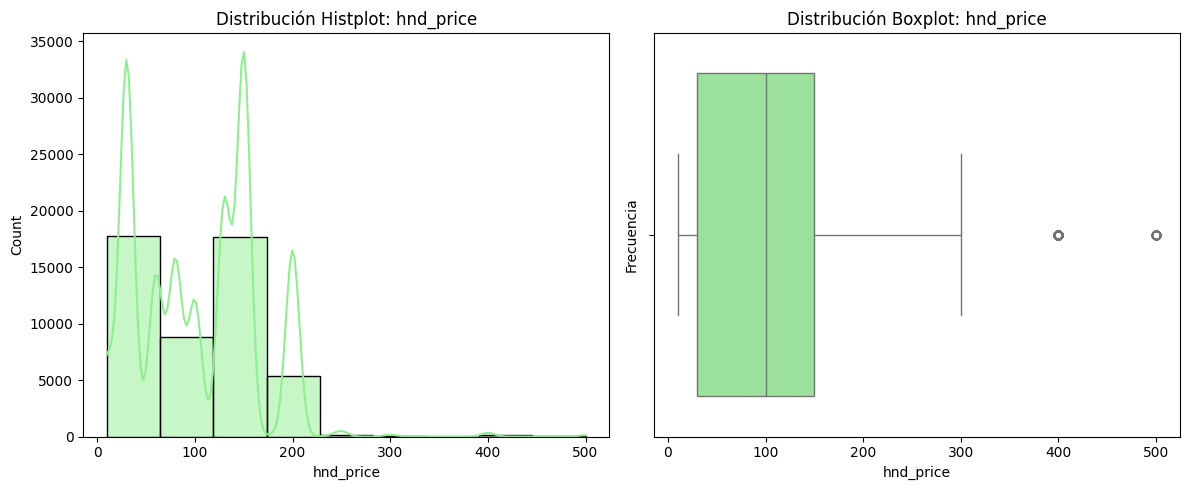

figure phones


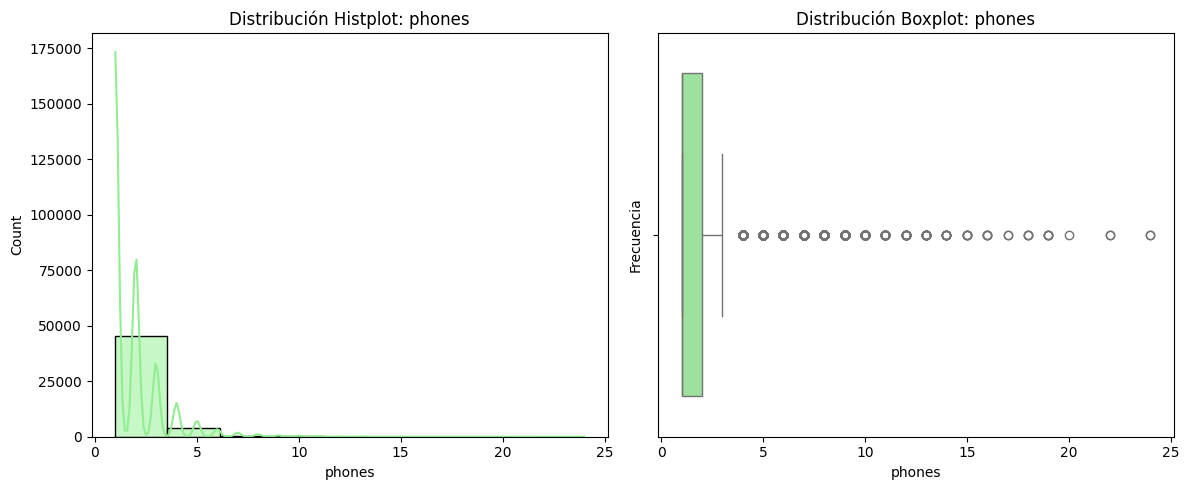

figure models


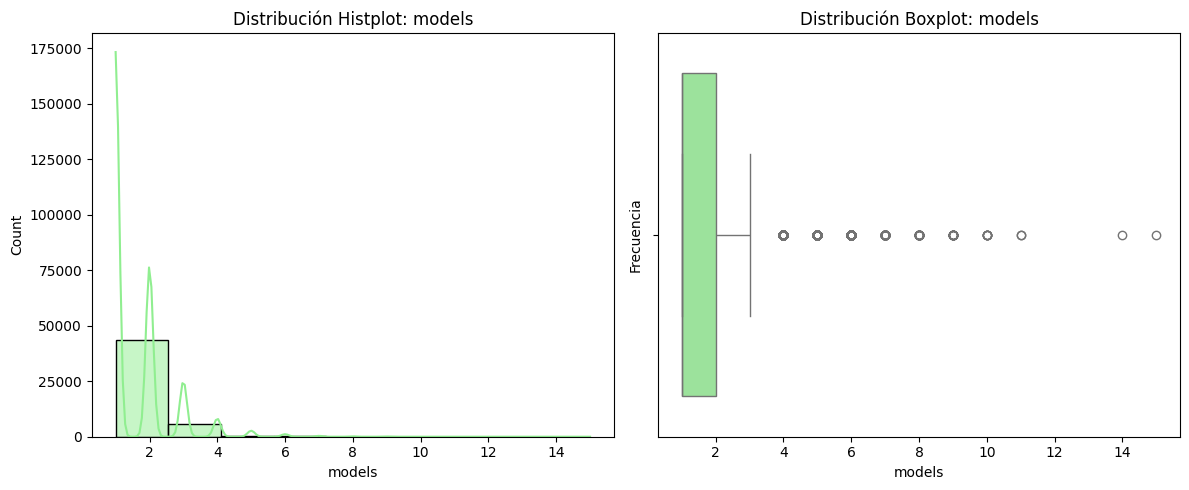

figure lor


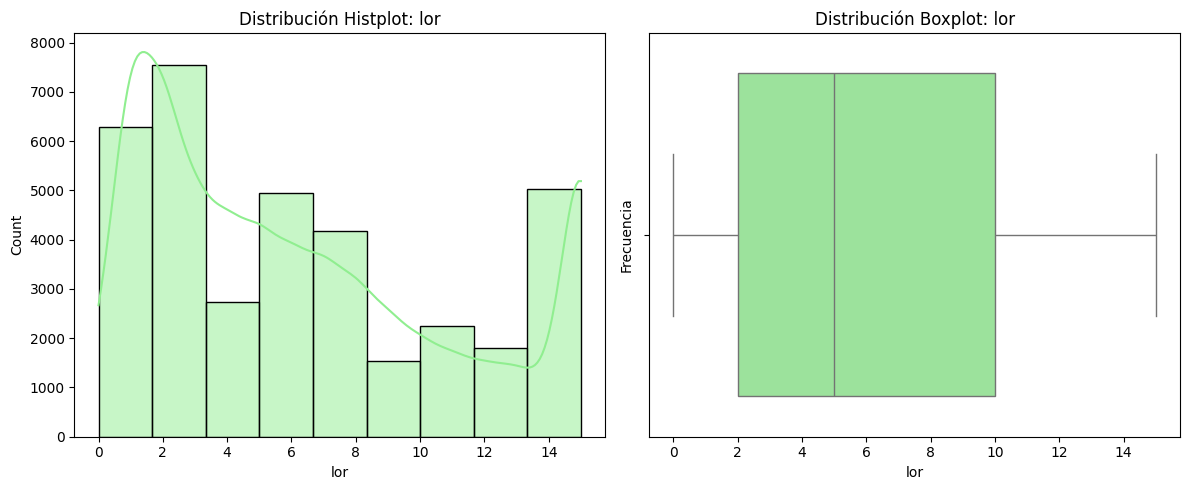

figure income


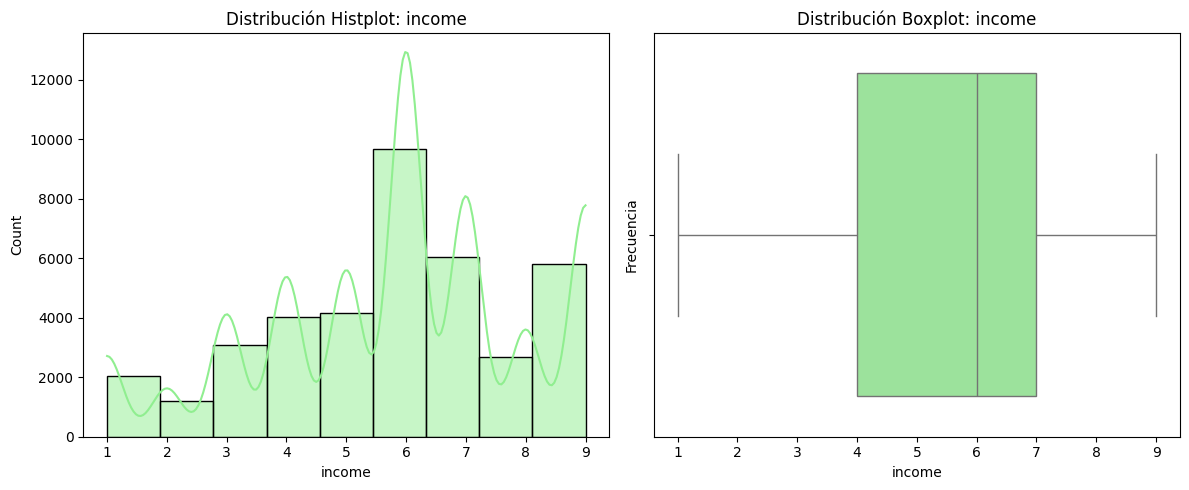

figure numbcars


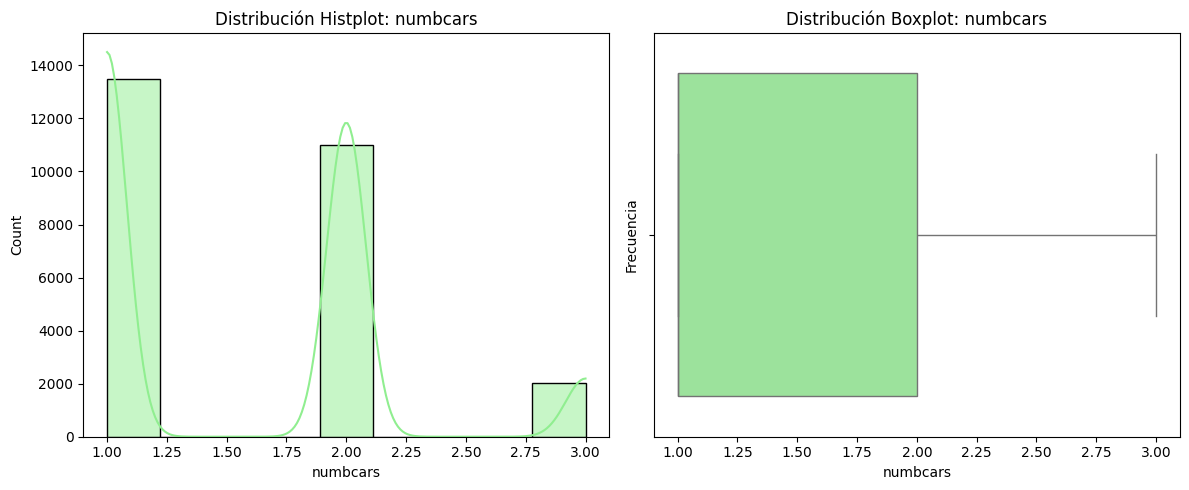

figure eqpdays


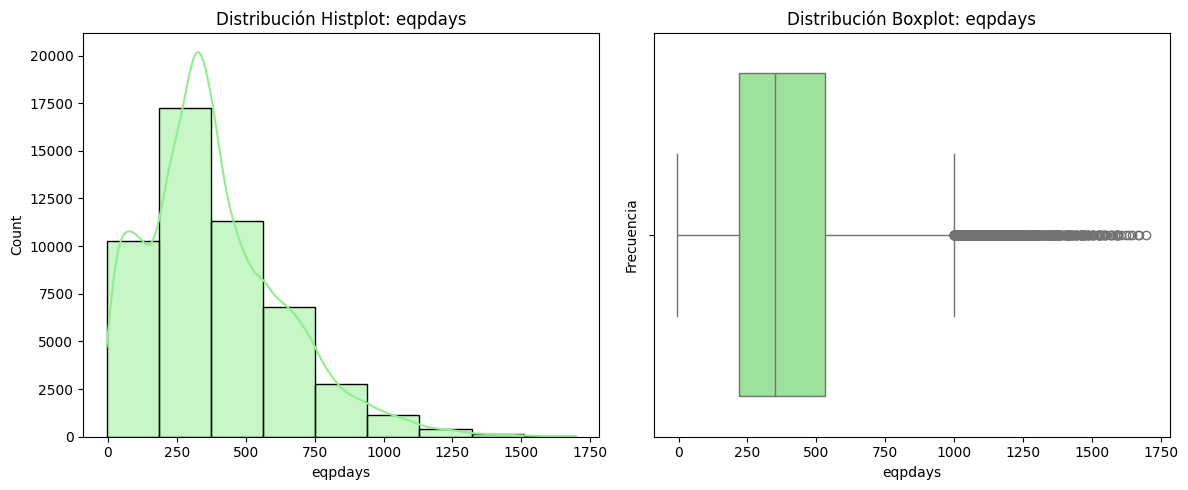

figure Customer_ID


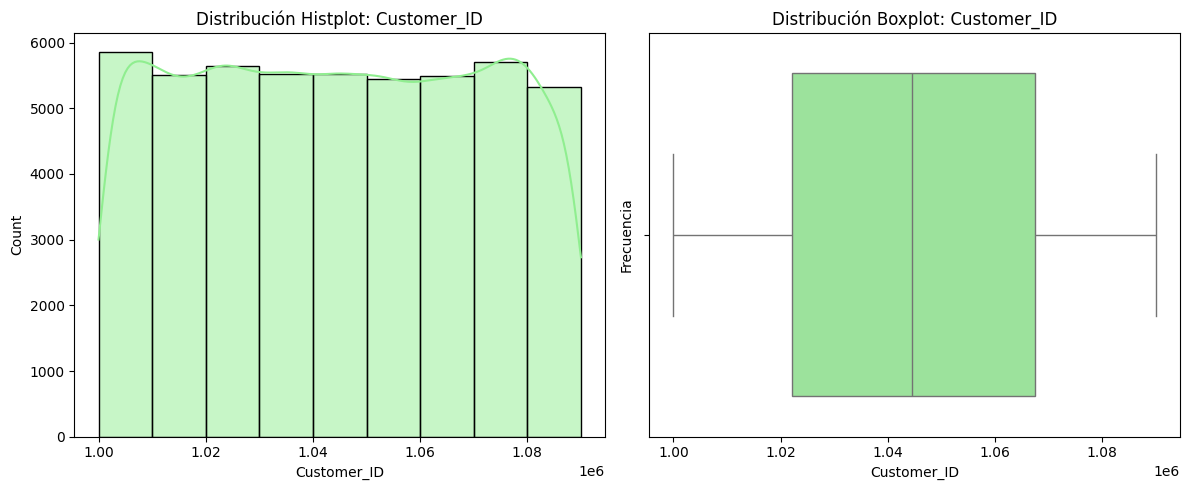

In [22]:
# creamos una funcion para graficar la distribucion de las variables numericas
def plot_numeric_distribution(df, numeric):
    for column in numeric:
        plt.figure(figsize=(12, 5))
        print(f'figure {column}')
        plt.subplot(1, 2, 1)
        sns.histplot(df[column], kde=True, bins = 9 ,color="#90EE90" )
        plt.title(f'Distribución Histplot: {column}')
        
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[column], color="#90EE90")
        plt.title(f'Distribución Boxplot: {column}')
       
        
        plt.xlabel(column)
        plt.ylabel('Frecuencia')
        plt.tight_layout()
        plt.show()
        
plot_numeric_distribution(df_entrenar, numeric_entrenar)


figure crclscod


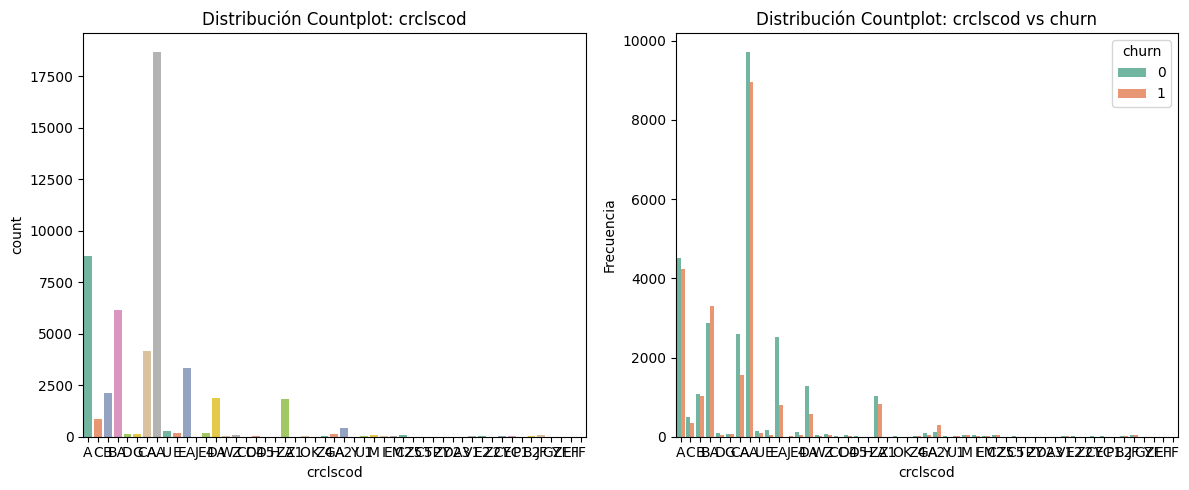

figure asl_flag


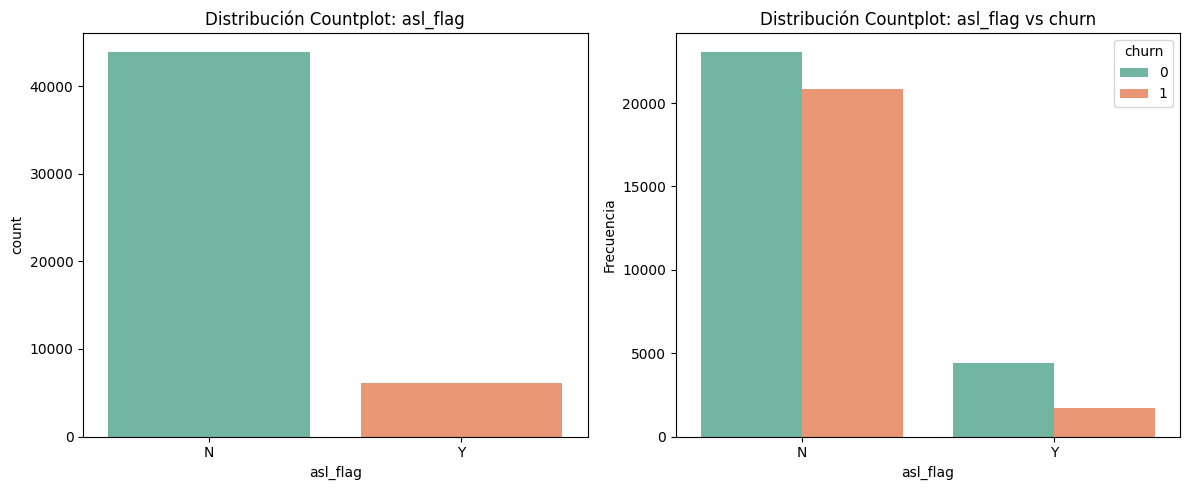

figure prizm_social_one


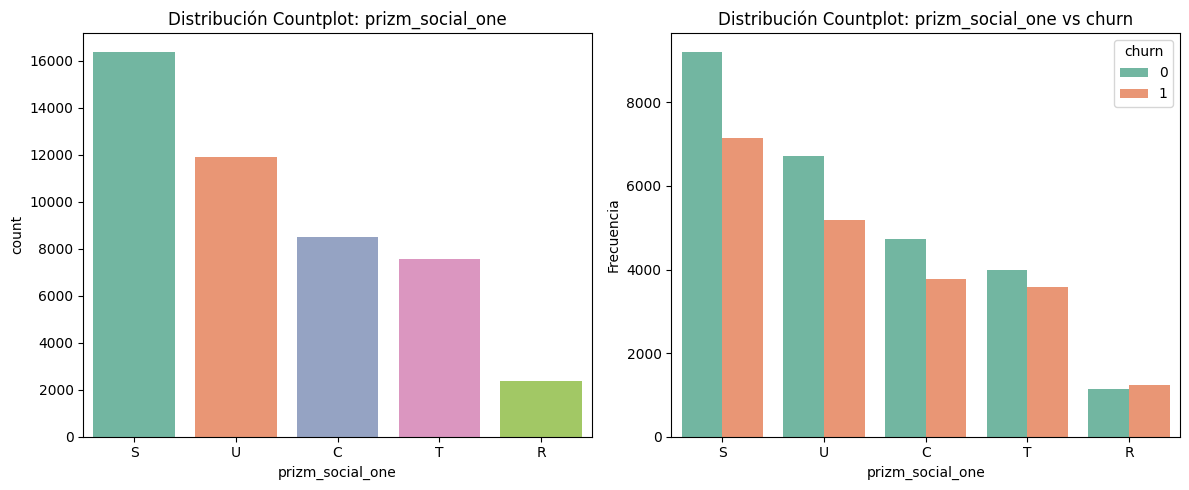

figure area


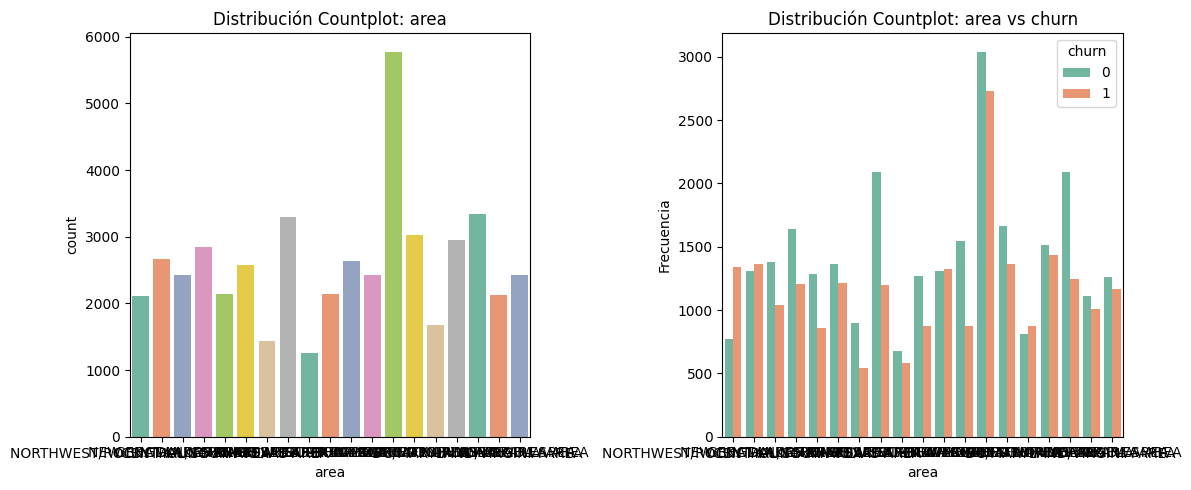

figure dualband


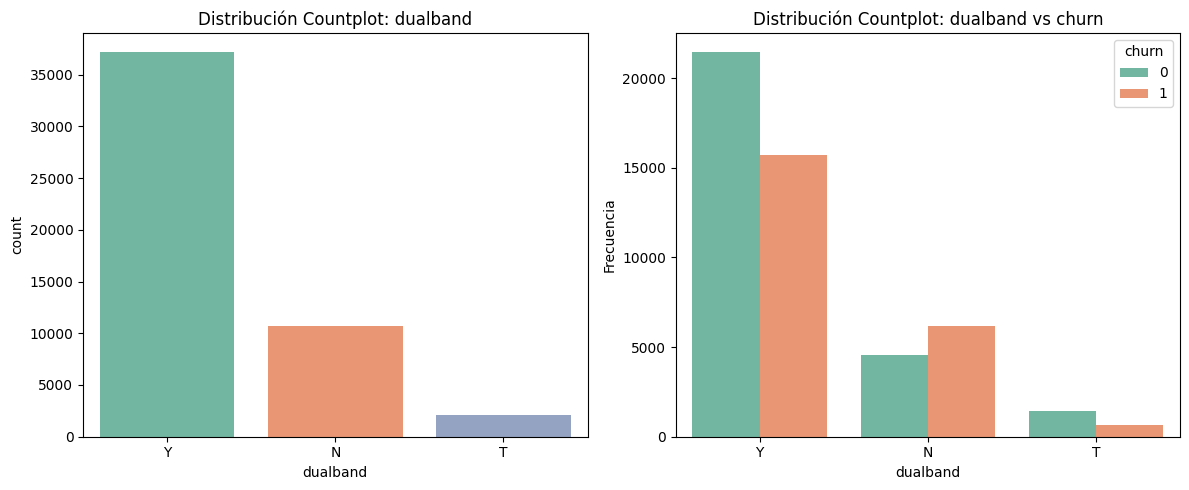

figure refurb_new


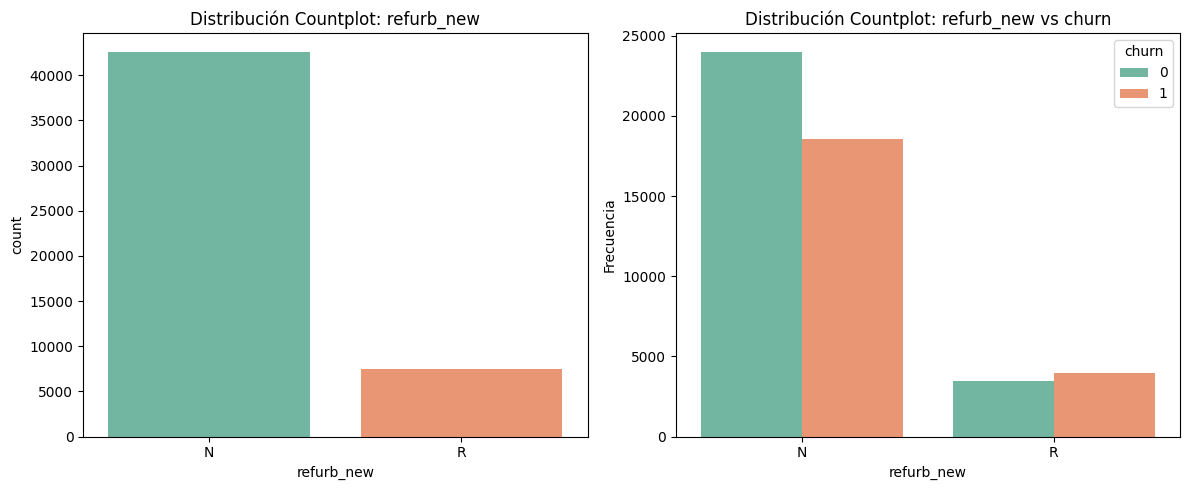

figure hnd_webcap


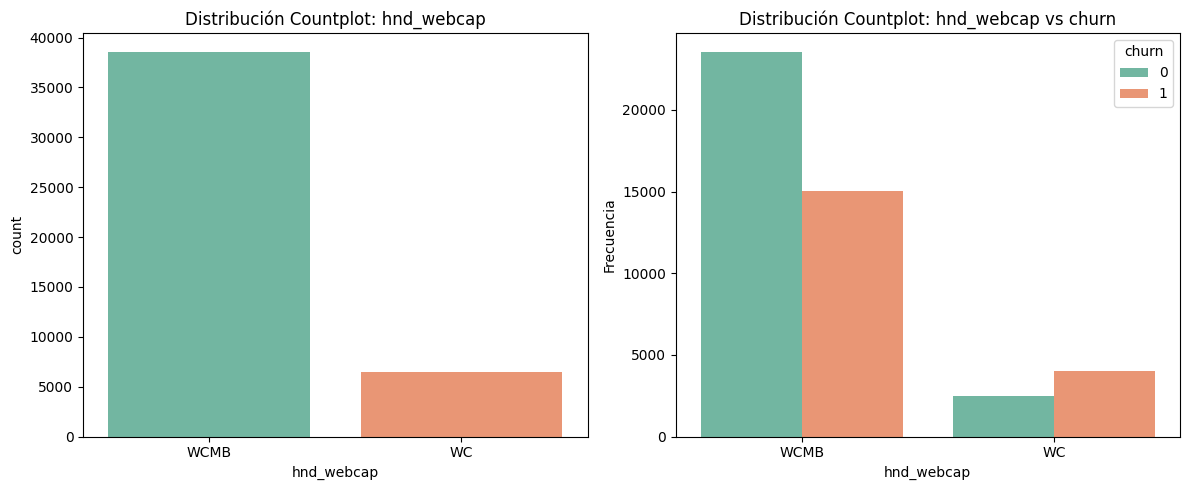

figure ownrent


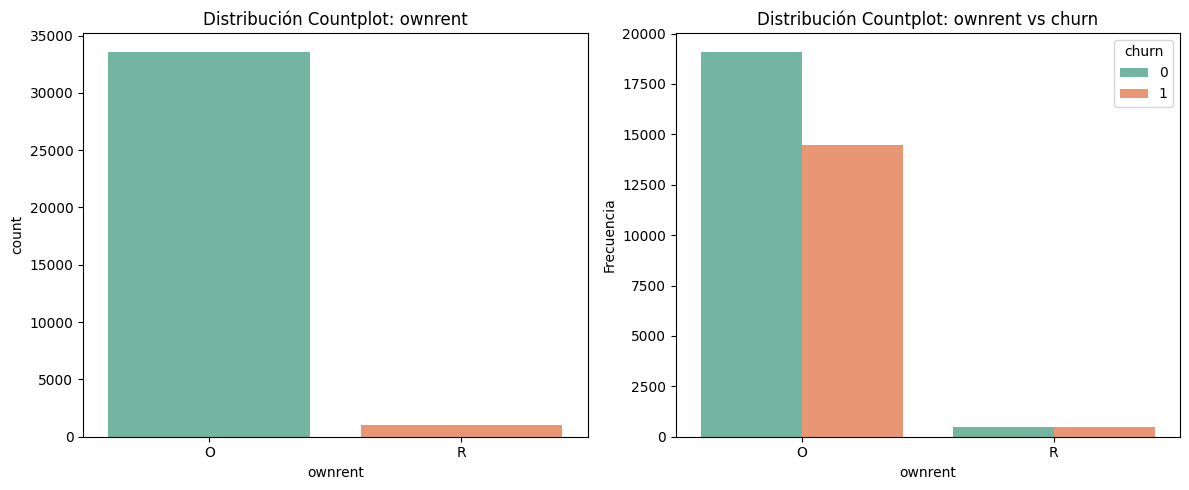

figure marital


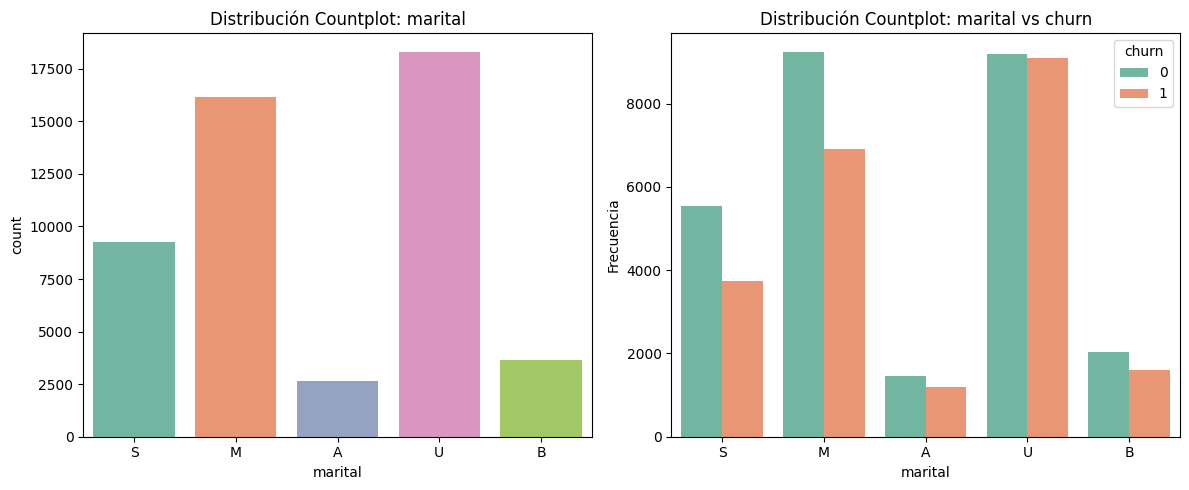

figure infobase


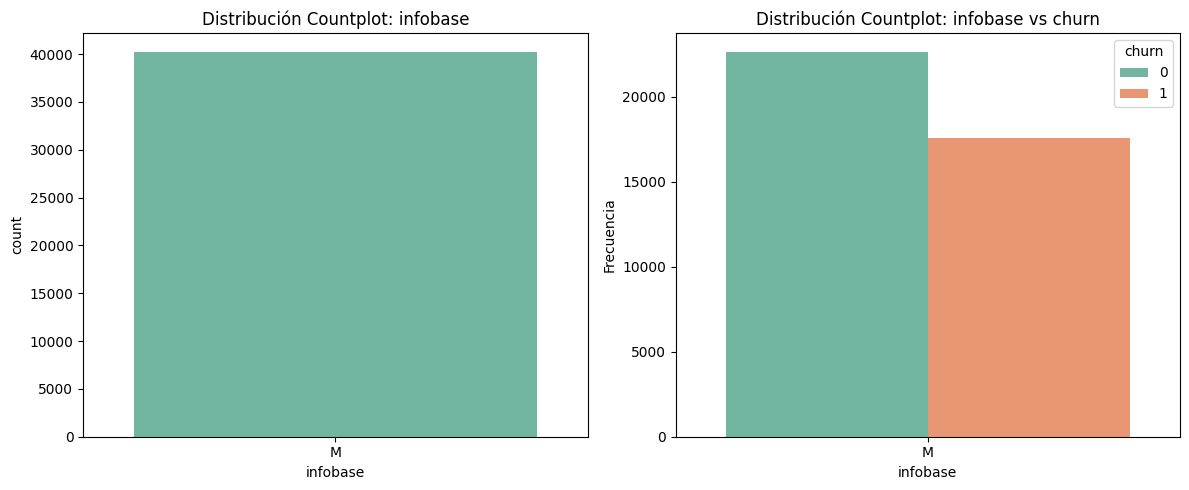

figure ethnic


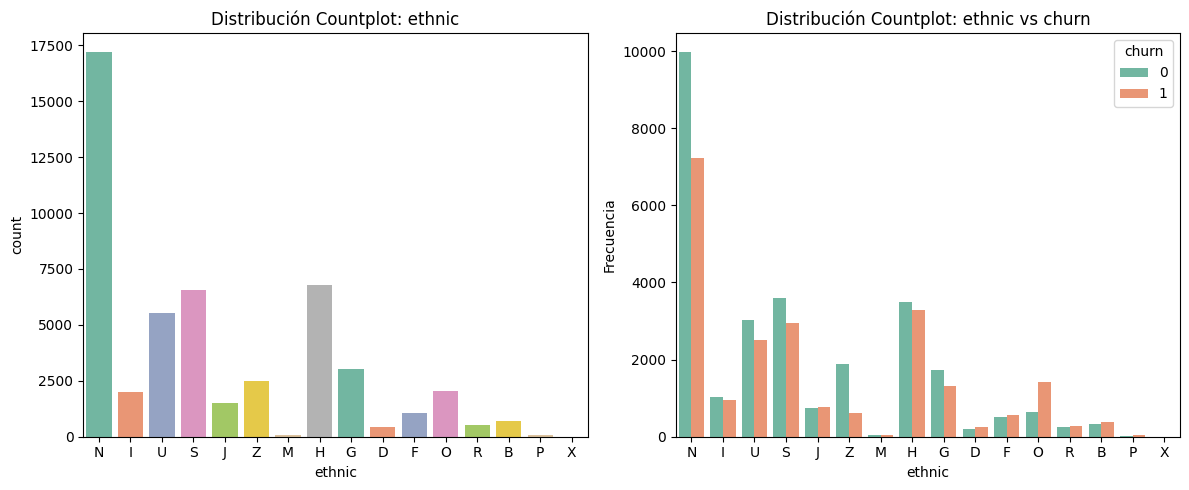

figure kid0_2


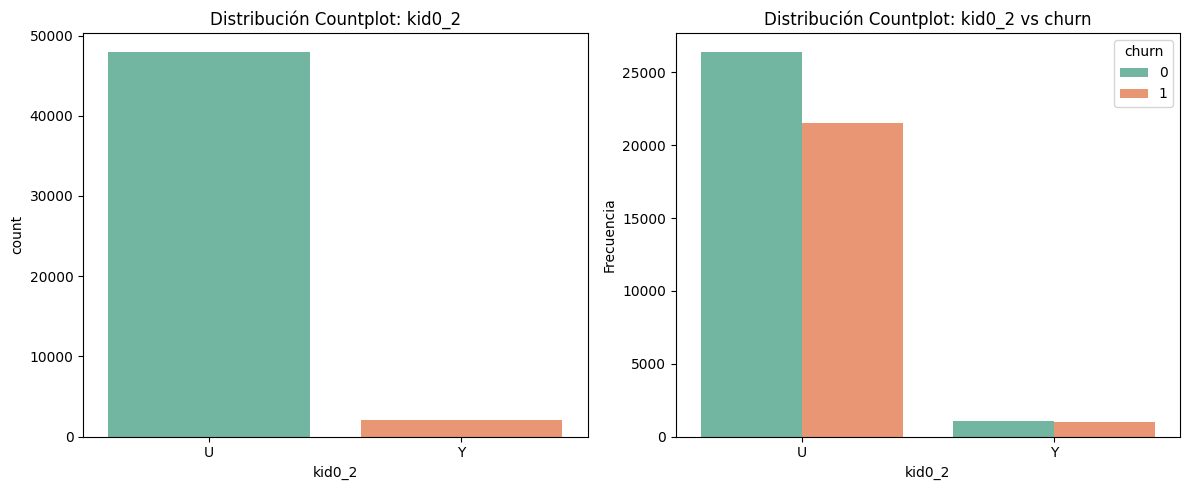

figure kid3_5


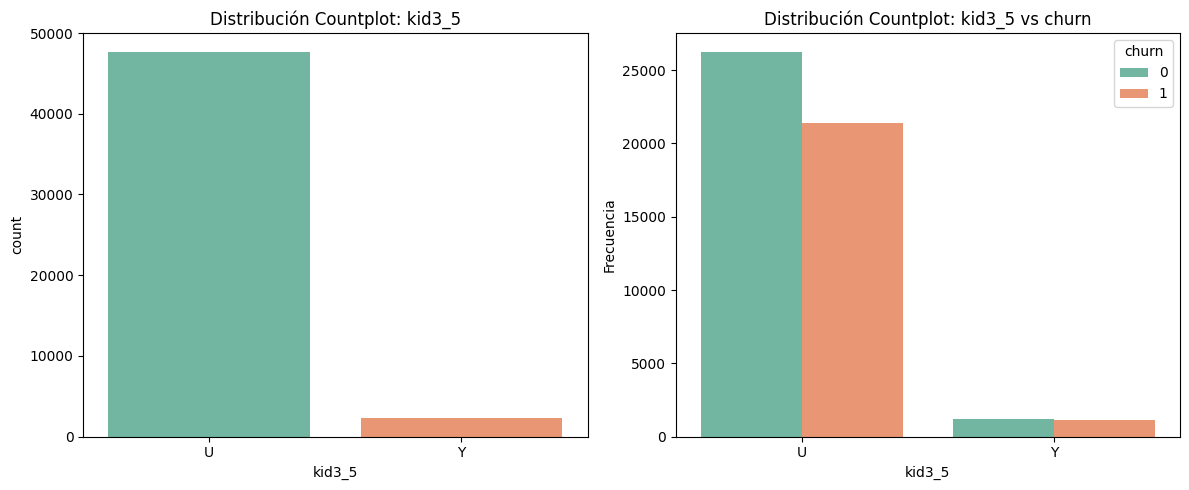

figure kid6_10


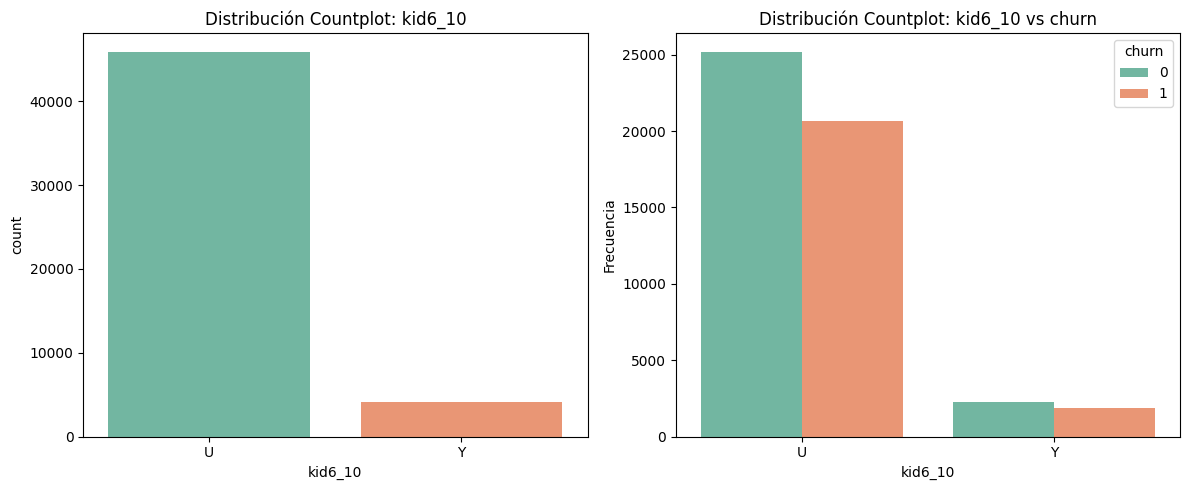

figure kid11_15


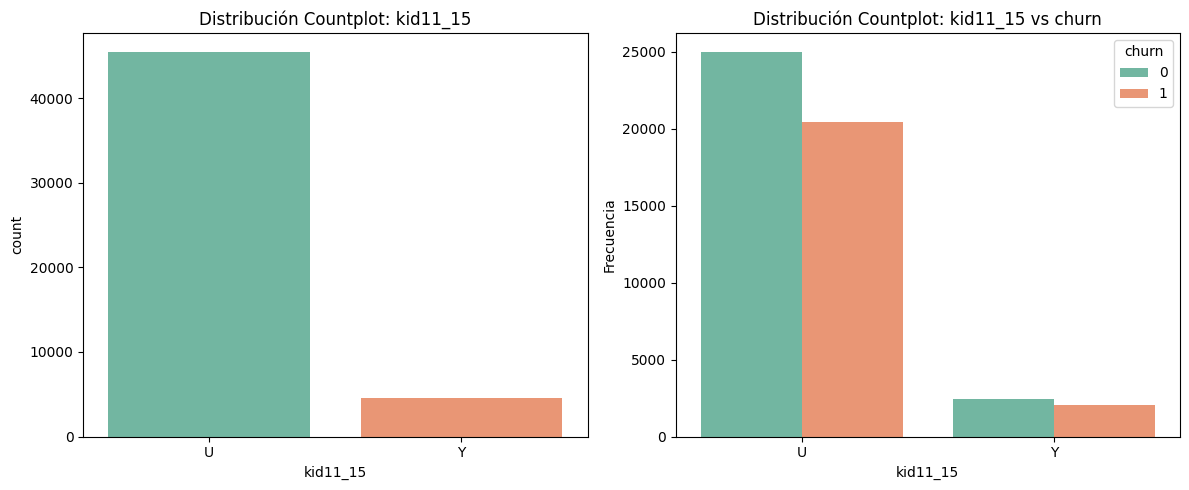

figure kid16_17


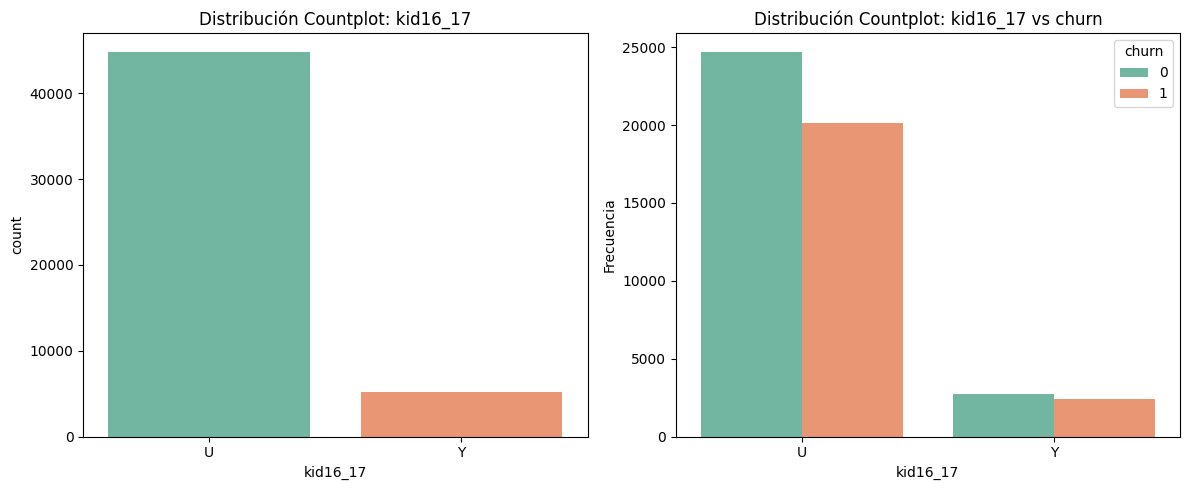

figure creditcd


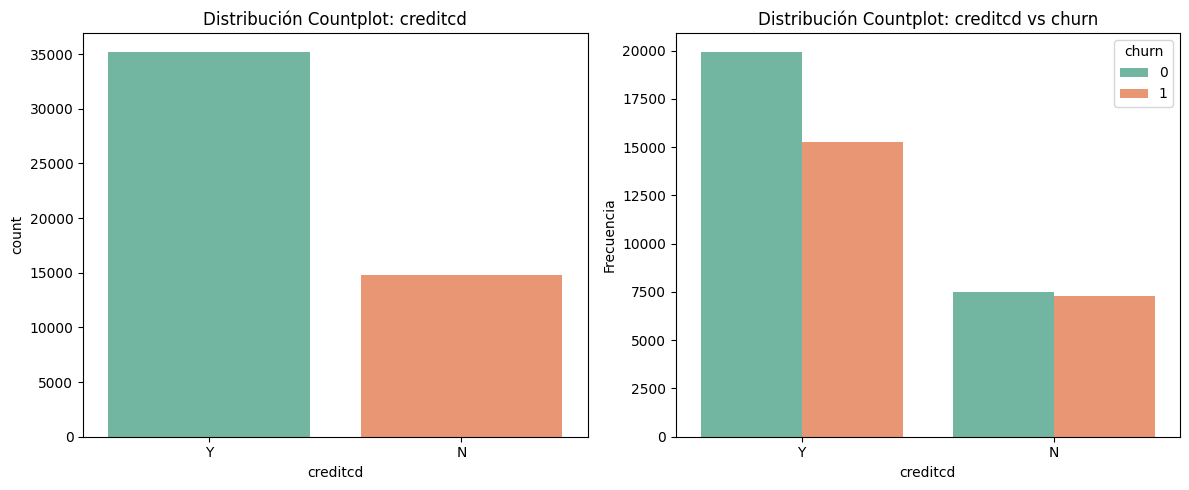

In [23]:
# creamos una funcion para graficar la distribucion de las variables categoricas
def plot_categorical_distribution(df, categoric):
    for column in categoric:
        plt.figure(figsize=(12, 5))
        print(f'figure {column}')
        plt.subplot(1, 2, 1)
        sns.countplot(x=column, data=df, palette='Set2')
        plt.title(f'Distribución Countplot: {column}')
        
        plt.subplot(1, 2, 2)
        sns.countplot(x=column, hue=target, data=df, palette='Set2')
        plt.title(f'Distribución Countplot: {column} vs {target}')
        
        plt.xlabel(column)
        plt.ylabel('Frecuencia')
        plt.tight_layout()
        plt.show()

plot_categorical_distribution(df_entrenar, categoric_entrenar)

### Analisis variables-target

# Preprocessing

## Data Cleaning

## Tratamiento de nulos

## Tratamiento de variables categóricas

## Alta correlación

## Baja varianza

# Modelado

## Feature importance

## Split train-test

## Rebalanceo del train

## Estandarización

## Competición de modelos


Competir sobre el f1_score

## Hiperparametrización

## Entrenamiento del modelo final

In [24]:
# entrenamiento

In [25]:
# predict

In [26]:
# predict_proba

# Evalucación del modelo final

## AUC

Calcular el AUC con el predict_proba

## matriz de confusión

## f1_score

# Guardar modelo

Guardar el modelo y lo que sea necesario para ejecutarlo (scaler)

# Interpretabilidad

## Modelo lineal

Si el mejor modelo ha sido un algoritmo basado en arbole de decisión, entrenamos el mejor modelo lineal de la competición de modelos, sin hiperparametrizar

Imprimir los coeficientes por variable + intercept

## Modelo de árbol de decisión

Si el mejor modelo ha sido un modelo lineal, entrenamos el mejor modelo basado en arboles de decisión, sin hiperparametrizar

&#x26a0;&#xfe0f;
El shap necesita el nombres de las variables. Estandarizar los datos los quita

### Shap values

### Summary_plot

## Interpretabilidad top 5 variables

Explicar muy brevemente cuales son las 5 variables que más impactan en el churn, y si el impacto es positivo o negativo.

# Predicción

&#x26a0;&#xfe0f;
Realizar la predicción sobre el 100% de los clientes a predecir.  


&#x26a0;&#xfe0f;
Asegurarse de hacer la predicción en las mismas condiciones que el entrenamiento

Imprimir los 20 clientes más propensos a irse

Imprimir el len del archivo de predicción

# Exportar predicción

Exportar un archivo excel con solamente 3 columnas, llamadas 'customer_id', 'predict' y 'predict_proba', **en minúscula**